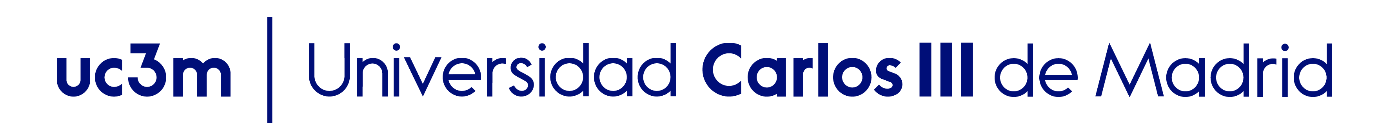**Practice 2**

**Student:** Katarzyna Klęczek **NIA:** 100549157

**General instructions:** given an specific context where CEO and VP have some doubts about results, we need to answer 3 main questions about the data and some other at the end.

**Main Questions are:**

1.   *The introduction of new systems in 2023 has improved our sales and profits significantly*
2.   *2023 e-marketing campaign has boosted Technology sales and profits over all other categories*
3. Office supplies are our most profitable product category

# Step 1: Data Collect

# Step 2: Data preprocessing

Loading the data and making sure that all the variables are in correct format and type for later analysis

## Loading of 2 different datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats


In [ ]:
# load first data file
df_2122= pd.read_csv("acme_2021_2022.csv", parse_dates=["Order Date", "Ship Date"], dayfirst=False)
#check how the data looks like
df_2122.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,"51,16",7,"0,0","14,5"
1,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,OFF-AR-10002833,Office Supplies,Art,Newell 322,"7,62",4,"0,0","2,01"
2,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,"949,79",6,"0,2","92,8"
3,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,"19,37",3,"0,2","5,92"
4,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,90032,3,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,"120,3",5,"0,0","35,26"


In [ ]:
#check the format of all the variables
df_2122.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084 entries, 0 to 4083
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4084 non-null   object        
 1   Order Date     4084 non-null   datetime64[ns]
 2   Ship Date      4084 non-null   datetime64[ns]
 3   Ship Mode      4084 non-null   object        
 4   Customer ID    4084 non-null   object        
 5   Customer Name  4084 non-null   object        
 6   Segment        4084 non-null   object        
 7   Country        4084 non-null   object        
 8   City           4084 non-null   object        
 9   State          4084 non-null   object        
 10  Postal Code    4084 non-null   int64         
 11  Region         4084 non-null   int64         
 12  Product ID     4084 non-null   object        
 13  Category       4084 non-null   object        
 14  Sub-Category   4084 non-null   object        
 15  Product Name   4084 n

In [ ]:
# Convert type to float for 'Sales', 'Discount', and 'Profit' columns
for column in ['Sales', 'Discount', 'Profit']:
  df_2122[column] = df_2122[column].str.replace(',', '.').astype(float)


In [ ]:
# make a new column year and splitting by year to separate dataframes
df_2122['Year'] = pd.DatetimeIndex(df_2122['Order Date']).year
df_21= df_2122.loc[df_2122['Year'] == 2021]
df_22= df_2122.loc[df_2122['Year'] == 2022]


In [ ]:
# load second data file and also check how the data looks like and the types of variables
df_2324 = pd.read_json("acme_2023_2024.json")
#df_2324.head()
df_2324.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4220 entries, 0 to 4219
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       4220 non-null   object 
 1   Order Date     4220 non-null   object 
 2   Ship Date      4220 non-null   object 
 3   Ship Mode      4220 non-null   object 
 4   Customer ID    4220 non-null   object 
 5   Customer Name  4220 non-null   object 
 6   Segment        4220 non-null   object 
 7   Country        4220 non-null   object 
 8   City           4220 non-null   object 
 9   State          4220 non-null   object 
 10  Postal Code    4220 non-null   int64  
 11  Region         4220 non-null   int64  
 12  Product ID     4220 non-null   object 
 13  Category       4220 non-null   object 
 14  Sub-Category   4220 non-null   object 
 15  Product Name   4220 non-null   object 
 16  Sales          4220 non-null   float64
 17  Quantity       4220 non-null   int64  
 18  Discount

In [ ]:
# changing the format of the columns with dates to be dates,
df_2324['Order Date'] = pd.to_datetime(df_2324['Order Date'], format='%d/%m/%Y')
df_2324['Ship Date'] = pd.to_datetime(df_2324['Ship Date'], format='%d/%m/%Y')

# creating new column year and splitting by year
df_2324['Year'] = pd.DatetimeIndex(df_2324['Order Date']).year
df_23= df_2324.loc[df_2324['Year'] == 2023]
df_24= df_2324.loc[df_2324['Year'] == 2024]

## Data cleaning and fix

Now checking the basic statistics of each year to try to understand the data and see if it make sense

In [ ]:
df_21.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,1979,1979,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.000000,1979.0
mean,2021-08-11 12:07:38.413339904,2021-08-08 03:22:17.038908672,57058.688732,1.587165,253.414361,3.798888,0.159101,24.863936,2021.0
min,2021-01-04 00:00:00,2021-01-03 00:00:00,1841.000000,0.000000,0.890000,1.000000,0.000000,-3787.040000,2021.0
25%,2021-05-22 00:00:00,2021-05-16 00:00:00,27707.000000,0.000000,16.845000,2.000000,0.000000,1.670000,2021.0
50%,2021-09-07 00:00:00,2021-08-30 00:00:00,60623.000000,2.000000,54.400000,3.000000,0.200000,8.180000,2021.0
75%,2021-11-10 00:00:00,2021-11-09 00:00:00,90008.000000,3.000000,228.625000,5.000000,0.200000,28.645000,2021.0
max,2021-12-31 00:00:00,2022-01-02 00:00:00,99301.000000,3.000000,23702.490000,14.000000,0.800000,4736.980000,2021.0
std,NaN,NaN,31658.997608,1.192688,790.751948,2.243737,0.206097,203.485108,0.0


In [ ]:
# we check the profits to see if there are any abnormalities, such as very high ones or very low ones
profit_list = list(df_21["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list[0:5], sorted_profit_list[-5:-1])

[4736.98, 2291.51, 2041.9, 1403.54, 1305.85] [-966.73, -1391.27, -1514.07, -1852.73]


The profit in the 2021 looks fine

In [ ]:
df_22.describe()


,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2105,2105,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,2022-08-13 02:14:04.845605632,2022-08-12 14:48:37.624703232,52682.340143,1.458907,274.519990,3.797150,0.154627,41.417729,2022.0
min,2022-01-02 00:00:00,2021-01-03 00:00:00,1040.000000,0.000000,1.200000,1.000000,0.000000,-3695.990000,2022.0
25%,2022-05-26 00:00:00,2022-05-27 00:00:00,19805.000000,0.000000,21.370000,2.000000,0.000000,2.350000,2022.0
50%,2022-09-06 00:00:00,2022-09-09 00:00:00,48227.000000,1.000000,73.080000,3.000000,0.100000,13.060000,2022.0
75%,2022-11-13 00:00:00,2022-11-15 00:00:00,85705.000000,3.000000,259.790000,5.000000,0.200000,48.180000,2022.0
max,2022-12-31 00:00:00,2023-01-02 00:00:00,99207.000000,3.000000,7753.040000,14.000000,0.800000,4448.460000,2022.0
std,NaN,NaN,32286.263098,1.216704,571.848879,2.237384,0.208465,259.328928,0.0


In [ ]:
profit_list = list(df_22["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list[0:5], sorted_profit_list[-5:-1])

[4448.46, 3224.15, 3120.63, 2669.08, 2072.65] [-1491.52, -1653.8, -2331.07, -2607.24]


In [ ]:
df_23.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2582,2582,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2582.0
mean,2023-08-08 07:06:05.298218496,2023-08-07 20:52:03.160340736,54506.855926,1.485670,360.640736,3.805964,0.154539,70.495387,2023.0
min,2023-01-02 00:00:00,2022-01-04 00:00:00,1752.000000,0.000000,0.000000,1.000000,0.000000,-6619.780000,2023.0
25%,2023-05-23 00:00:00,2023-05-24 06:00:00,22153.000000,0.000000,27.450000,2.000000,0.000000,1.880000,2023.0
50%,2023-08-29 00:00:00,2023-09-01 00:00:00,54302.000000,1.000000,81.035000,3.000000,0.200000,8.825000,2023.0
75%,2023-11-07 00:00:00,2023-11-10 00:00:00,90004.000000,3.000000,318.945000,5.000000,0.200000,29.210000,2023.0
max,2023-12-31 00:00:00,2024-01-02 00:00:00,99207.000000,3.000000,26774.920000,14.000000,0.800000,91585.940000,2023.0
std,NaN,NaN,32186.720907,1.207777,1023.293032,2.208064,0.204061,1830.397802,0.0


We can see that there is something odd with the profit here in comparison to the other ones

In [ ]:
# we check the profits to see if there are any abnormalities,
#such as very high ones or very low ones
profit_list = list(df_23["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
(sorted_profit_list[0], sorted_profit_list[-1])

(91585.94, -6619.78)

Here the highest profit looks very bad,, it is very likely to be a mistake when data was inputed to the datafame and so we should remove it.

In [ ]:
# we first check what it was as some things could have been that expensive
df_23[df_23["Profit"] > 75000]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
161,2023-166674,2023-04-03,2023-04-05,Second Class,RB-19360,Raymond Cooper,Consumer,United States,Auburn,New York,...,0,TEC-PH-10002365,Technology,Phones,Belkin Grip Candy Sheer Case / Cover for iPhon...,53.73,4,0.0,91585.94,2023


Because it was just some cover case, there is no way that this is a correct price, so we should remove it definietely

In [ ]:
# We create a list of the profits and the indexes and we sort them by the profits
profit_with_index = [(profit, index) for index, profit in enumerate(df_23["Profit"])]
profit_with_index.sort(key=lambda x: x[0], reverse=True)
# we check if we have the correct "wrong" profit and its index
print(profit_with_index[0])

# we update the database by removing the wrong profit
updated_df_23=df_23.drop(profit_with_index[0][1])

#we check the statistics again to see if it looks good
updated_df_23.describe()

(91585.94, 161)


,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2581,2581,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.0
mean,2023-08-08 08:17:06.578845440,2023-08-07 22:01:43.215807744,54522.929485,1.486246,360.759647,3.805889,0.154599,35.038028,2023.0
min,2023-01-02 00:00:00,2022-01-04 00:00:00,1752.000000,0.000000,0.000000,1.000000,0.000000,-6619.780000,2023.0
25%,2023-05-23 00:00:00,2023-05-25 00:00:00,22153.000000,0.000000,27.450000,2.000000,0.000000,1.880000,2023.0
50%,2023-08-29 00:00:00,2023-09-01 00:00:00,54302.000000,1.000000,81.470000,3.000000,0.200000,8.820000,2023.0
75%,2023-11-07 00:00:00,2023-11-10 00:00:00,90004.000000,3.000000,319.100000,5.000000,0.200000,29.120000,2023.0
max,2023-12-31 00:00:00,2024-01-02 00:00:00,99207.000000,3.000000,26774.920000,14.000000,0.800000,8425.180000,2023.0
std,NaN,NaN,32182.591645,1.207657,1023.473483,2.208489,0.204078,322.867259,0.0


The profit is still a bit odd so we check the other high ones, we saw prevoiusly that there were a few higher than 8k, so we check them now

In [ ]:
print(df_23[df_23['Profit'] > 8000])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
161   2023-166674 2023-04-03 2023-04-05    Second Class    RB-19360   
1749  2023-118689 2023-10-04 2023-10-11  Standard Class    TC-20980   
2525  2023-108210 2023-06-01 2023-06-02        Same Day    AT-10735   

       Customer Name    Segment        Country       City     State  ...  \
161   Raymond Cooper   Consumer  United States     Auburn  New York  ...   
1749    Tamara Lewis  Corporate  United States  Lafayette   Indiana  ...   
2525    Annie Butler   Consumer  United States    Houston     Texas  ...   

      Region       Product ID    Category Sub-Category  \
161        0  TEC-PH-10002365  Technology       Phones   
1749       1  TEC-CO-10004722  Technology      Copiers   
2525       1  TEC-PH-10002293  Technology       Phones   

                                           Product Name     Sales  Quantity  \
161   Belkin Grip Candy Sheer Case / Cover for iPhon...     53.73         4   
1749              C

Here we can also see that a 4-port USB wall charger was sold in 5 copies, but the sales for that entry is 00 while the profit is 8019. It looks also strange.

In [ ]:
print(df_23[df_23['Product ID'] == "TEC-PH-10002293"])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
619   2023-155481 2023-09-03 2023-09-07  Standard Class    DK-13225   
2525  2023-108210 2023-06-01 2023-06-02        Same Day    AT-10735   

     Customer Name    Segment        Country          City         State  ...  \
619     Dean James  Corporate  United States  Philadelphia  Pennsylvania  ...   
2525  Annie Butler   Consumer  United States       Houston         Texas  ...   

      Region       Product ID    Category Sub-Category  \
619        0  TEC-PH-10002293  Technology       Phones   
2525       1  TEC-PH-10002293  Technology       Phones   

                                           Product Name Sales  Quantity  \
619   Anker 36W 4-Port USB Wall Charger Travel Power...  36.7         2   
2525  Anker 36W 4-Port USB Wall Charger Travel Power...   0.0         5   

      Discount   Profit  Year  
619        0.4    -4.81  2023  
2525       0.2  8019.99  2023  

[2 rows x 21 columns]


The sale and profit here is definetely wrong, we should do soemthing about it.
We could deduct the price but we can't really deduct the profit,
so it's best to remove the entry

In [ ]:
# Remove the entry where Profit is 8019.99 from df_23,

updated_df_23 = df_23[df_23['Profit'] != 8019.99]

In [ ]:
# we also check the lowest profit as it also loooks very strange
print(df_23[df_23['Profit'] == -6619.78])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
2023  2023-108196 2023-11-27 2023-12-04  Standard Class    CS-12505   

     Customer Name   Segment        Country       City State  ...  Region  \
2023    Cindy Hall  Consumer  United States  Lancaster  Ohio  ...       0   

           Product ID    Category Sub-Category  \
2023  TEC-MA-10000418  Technology     Machines   

                                   Product Name    Sales  Quantity  Discount  \
2023  Cubify CubeX 3D Printer Double Head Print  6884.98         5       0.7   

       Profit  Year  
2023 -6619.78  2023  

[1 rows x 21 columns]


The super low profit is fine because there was a huge discount applied in that case

In [ ]:
#So we see how at the end the data from 23 looked like
updated_df_23.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,2581,2581,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.000000,2581.0
mean,2023-08-08 07:44:11.530414592,2023-08-07 21:29:21.642774016,54498.125145,1.485858,360.780465,3.805502,0.154522,67.415382,2023.0
min,2023-01-02 00:00:00,2022-01-04 00:00:00,1752.000000,0.000000,1.280000,1.000000,0.000000,-6619.780000,2023.0
25%,2023-05-23 00:00:00,2023-05-24 00:00:00,22153.000000,0.000000,27.450000,2.000000,0.000000,1.880000,2023.0
50%,2023-08-29 00:00:00,2023-09-01 00:00:00,54302.000000,1.000000,81.470000,3.000000,0.200000,8.820000,2023.0
75%,2023-11-07 00:00:00,2023-11-10 00:00:00,90004.000000,3.000000,319.100000,5.000000,0.200000,29.120000,2023.0
max,2023-12-31 00:00:00,2024-01-02 00:00:00,99207.000000,3.000000,26774.920000,14.000000,0.800000,91585.940000,2023.0
std,NaN,NaN,32189.899877,1.207973,1023.466688,2.208367,0.204099,1824.048034,0.0


In [ ]:
# we move on to last year and see the basic statistics
df_24.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,1638,1638,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.0
mean,2024-05-10 21:57:48.131868160,2024-05-11 23:09:53.406593536,57013.166667,1.553724,381.671404,3.741758,0.158083,51.413181,2024.0
min,2024-01-02 00:00:00,2023-01-04 00:00:00,1841.000000,0.000000,0.710000,1.000000,0.000000,-3501.980000,2024.0
25%,2024-03-20 00:00:00,2024-03-23 06:00:00,28540.000000,0.000000,27.352500,2.000000,0.000000,1.805000,2024.0
50%,2024-05-15 00:00:00,2024-05-18 00:00:00,60610.000000,1.000000,89.880000,3.000000,0.200000,8.910000,2024.0
75%,2024-07-04 00:00:00,2024-07-10 00:00:00,90032.000000,3.000000,335.952500,5.000000,0.200000,30.360000,2024.0
max,2024-08-30 00:00:00,2024-09-05 00:00:00,99207.000000,3.000000,43507.200000,14.000000,0.800000,27980.100000,2024.0
std,NaN,NaN,31476.358715,1.198852,1413.577835,2.169338,0.211509,732.768162,0.0


The profit and sales here also is worth checking, so we look at the few highets profit entries

In [ ]:
profit_list = list(df_24["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list[0:5])

[27980.1, 6921.58, 2579.35, 1718.25, 1496.72]


We check the one above 20k profit

In [ ]:
print(df_24[df_24['Profit'] == 27980.1])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
4129  2024-151855 2024-05-28 2024-06-04  Standard Class    BW-11110   

     Customer Name    Segment        Country        City           State  ...  \
4129   Bart Weaver  Corporate  United States  Greensboro  North Carolina  ...   

      Region       Product ID    Category Sub-Category  \
4129       2  TEC-AC-10002380  Technology  Accessories   

                                       Product Name    Sales  Quantity  \
4129  Sony 64GB Class 10 Micro SDHC R40 Memory Card  43507.2         3   

      Discount   Profit  Year  
4129       0.2  27980.1  2024  

[1 rows x 21 columns]


In [ ]:
updated_df_24 = df_24.loc[df_24["Profit"]<27980,:]
# we should remove it because it is too big for a memory card

And now we check the sales

In [ ]:
sales_list = list(df_24["Sales"])
sorted_sales_list = sorted(sales_list, reverse=True)
print(sorted_sales_list[0:5])

[43507.2, 22399.94, 8710.34, 7679.97, 7065.88]


In [ ]:
print(df_24[df_24['Sales'] == 43507.2])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
4129  2024-151855 2024-05-28 2024-06-04  Standard Class    BW-11110   

     Customer Name    Segment        Country        City           State  ...  \
4129   Bart Weaver  Corporate  United States  Greensboro  North Carolina  ...   

      Region       Product ID    Category Sub-Category  \
4129       2  TEC-AC-10002380  Technology  Accessories   

                                       Product Name    Sales  Quantity  \
4129  Sony 64GB Class 10 Micro SDHC R40 Memory Card  43507.2         3   

      Discount   Profit  Year  
4129       0.2  27980.1  2024  

[1 rows x 21 columns]


IT is the same as the previous one so it's good that we already removed it. It must have been a mistake

In [ ]:
#we check again how the data looks like
updated_df_24.describe()

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year
count,1637,1637,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.0
mean,2024-05-10 21:42:46.401954816,2024-05-11 22:49:37.642027776,57031.253513,1.553451,355.327159,3.742211,0.158057,34.352285,2024.0
min,2024-01-02 00:00:00,2023-01-04 00:00:00,1841.000000,0.000000,0.710000,1.000000,0.000000,-3501.980000,2024.0
25%,2024-03-20 00:00:00,2024-03-23 00:00:00,28540.000000,0.000000,27.340000,2.000000,0.000000,1.800000,2024.0
50%,2024-05-15 00:00:00,2024-05-18 00:00:00,60610.000000,1.000000,89.710000,3.000000,0.200000,8.890000,2024.0
75%,2024-07-04 00:00:00,2024-07-10 00:00:00,90032.000000,3.000000,335.900000,5.000000,0.200000,30.240000,2024.0
max,2024-08-30 00:00:00,2024-09-05 00:00:00,99207.000000,3.000000,22399.940000,14.000000,0.800000,6921.580000,2024.0
std,NaN,NaN,31477.461534,1.199168,928.399335,2.169923,0.211571,245.370050,0.0


Now we combine all the data as we checked

In [ ]:
df_total = pd.concat([df_21, df_22, updated_df_23, updated_df_24], ignore_index=True)
df_total.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,51.16,7,0.0,14.50,2021
1,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.62,4,0.0,2.01,2021
2,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,949.79,6,0.2,92.80,2021
3,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,19.37,3,0.2,5.92,2021
4,2021-115812,2021-06-10,2021-06-15,Standard Class,BH-11710,Brosina Russell,Consumer,United States,Los Angeles,California,...,3,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,120.30,5,0.0,35.26,2021


##For future purpose we hav eto add a column also with months, so we do it

In [ ]:
df_total['Month'] = pd.DatetimeIndex(df_total['Order Date']).month

We will also need a profit margin

In [ ]:
#margin_profit
df_total['profit_margin']= (df_total['Profit']- df_total['Sales']).round(2)

## Merging all the data

In [ ]:
# we check if the data looks good in terms of types of variables
df_total.info()
df_total.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8302 non-null   object        
 1   Order Date     8302 non-null   datetime64[ns]
 2   Ship Date      8302 non-null   datetime64[ns]
 3   Ship Mode      8302 non-null   object        
 4   Customer ID    8302 non-null   object        
 5   Customer Name  8302 non-null   object        
 6   Segment        8302 non-null   object        
 7   Country        8302 non-null   object        
 8   City           8302 non-null   object        
 9   State          8302 non-null   object        
 10  Postal Code    8302 non-null   int64         
 11  Region         8302 non-null   int64         
 12  Product ID     8302 non-null   object        
 13  Category       8302 non-null   object        
 14  Sub-Category   8302 non-null   object        
 15  Product Name   8302 n

,Order Date,Ship Date,Postal Code,Region,Sales,Quantity,Discount,Profit,Year,Month,profit_margin
count,8302,8302,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000,8302.000000
mean,2023-01-10 06:22:58.944832512,2023-01-09 10:00:08.672609024,55147.590219,1.516502,312.240007,3.789328,0.156337,44.160906,2022.466875,7.239701,-268.079101
min,2021-01-04 00:00:00,2021-01-03 00:00:00,1040.000000,0.000000,0.710000,1.000000,0.000000,-6619.780000,2021.000000,1.000000,-25555.220000
25%,2022-02-10 00:00:00,2022-02-06 00:00:00,23223.000000,0.000000,22.800000,2.000000,0.000000,1.890000,2022.000000,5.000000,-252.305000
50%,2023-01-23 00:00:00,2023-01-14 00:00:00,57103.000000,1.000000,72.630000,3.000000,0.200000,9.540000,2023.000000,7.000000,-58.815000
75%,2023-11-24 00:00:00,2023-11-26 00:00:00,90004.000000,3.000000,289.030000,5.000000,0.200000,32.862500,2023.000000,10.000000,-17.980000
max,2024-08-30 00:00:00,2024-09-05 00:00:00,99301.000000,3.000000,26774.920000,14.000000,0.800000,91585.940000,2024.000000,12.000000,91532.210000
std,NaN,NaN,31993.997605,1.205699,854.168031,2.216467,0.207146,1035.931533,1.058373,3.306184,1258.499385


## Now we also show some plots of general data trends


### Cleaning outliers for better graphs and statistics comparisons

In [ ]:
#cleaning outliers
sales_list = list(df_total["Sales"])
sorted_sales_list = sorted(sales_list, reverse=True)
print(sorted_sales_list)

[26774.92, 23702.49, 22399.94, 15135.89, 13922.89, 13387.42, 12851.96, 9894.1, 8710.34, 8572.47, 8543.47, 8261.86, 7753.04, 7679.97, 7516.26, 7496.89, 7328.96, 7065.88, 6988.63, 6940.04, 6888.88, 6884.98, 6849.5, 6663.41, 6662.48, 6363.14, 6119.92, 6013.01, 5977.91, 5665.44, 5447.2, 5375.92, 5373.98, 5362.5, 5243.13, 5212.2, 5159.02, 5137.13, 5121.48, 4895.97, 4799.92, 4799.92, 4762.6, 4703.89, 4651.82, 4651.2, 4626.61, 4486.27, 4469.64, 4417.2, 4359.76, 4305.55, 4283.94, 4283.94, 4196.21, 4179.6, 4146.5, 4140.29, 4098.78, 4079.98, 4029.26, 3963.2, 3941.19, 3921.48, 3848.32, 3842.91, 3839.94, 3839.94, 3832.32, 3780.56, 3761.78, 3757.6, 3721.46, 3718.02, 3666.49, 3666.29, 3664.43, 3627.45, 3583.9, 3488.34, 3481.52, 3420.78, 3419.9, 3415.95, 3415.93, 3265.54, 3235.64, 3219.96, 3205.07, 3203.8, 3202.65, 3198.01, 3181.48, 3132.76, 3109.24, 3101.22, 3081.41, 3078.66, 3072.24, 3065.39, 3059.94, 3029.29, 3028.94, 3023.91, 2993.18, 2986.32, 2949.21, 2939.81, 2931.56, 2889.41, 2882.61, 2864.54,

In [ ]:
print(df_total[df_total["Sales"]>10000])
#total_without_out_sales.describe()

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
511   2021-145317 2021-03-19 2021-03-24  Standard Class    SM-20320   
5201  2023-107440 2023-04-18 2023-04-22  Standard Class    BS-11365   
5727  2023-143714 2023-05-25 2023-05-29  Standard Class    CC-12370   
5821  2023-118689 2023-10-04 2023-10-11  Standard Class    TC-20980   
6270  2023-158841 2023-02-03 2023-02-05    Second Class    SE-20110   
6431  2023-117121 2023-12-19 2023-12-23  Standard Class    AB-10105   
7994  2024-140151 2024-03-24 2024-03-26     First Class    RB-19360   

          Customer Name      Segment        Country          City  \
511         Sean Wright  Home Office  United States  Jacksonville   
5201      Bill Sullivan    Corporate  United States      Lakewood   
5727  Christopher Allen     Consumer  United States  Philadelphia   
5821       Tamara Lewis    Corporate  United States     Lafayette   
6270      Sanjit Rivera     Consumer  United States     Arlington   
6431    Adrian Ma

In [ ]:
# Calculate the first and third quartiles of the 'Sales' column
q1 = df_total['Sales'].quantile(0.25)
q3 = df_total['Sales'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers based on the IQR
df_total_sales_filtered = df_total[(df_total['Sales'] >= lower_bound) & (df_total['Sales'] <= upper_bound)]

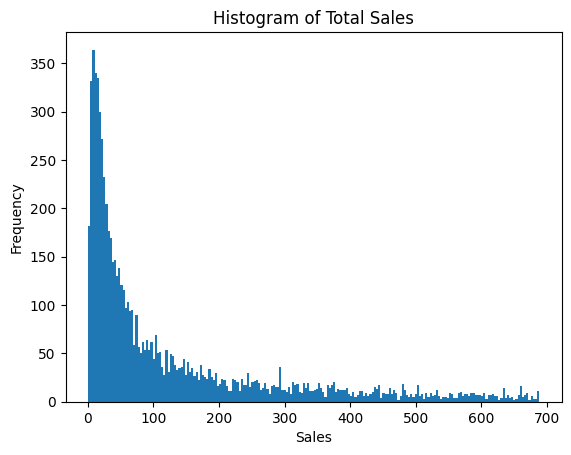

In [ ]:
plt.hist(df_total_sales_filtered['Sales'], bins=210)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Total Sales')
plt.show()

<ipython-input-93-e07b9ec9c457>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Sales', data=df_total_sales_filtered, palette="cubehelix")


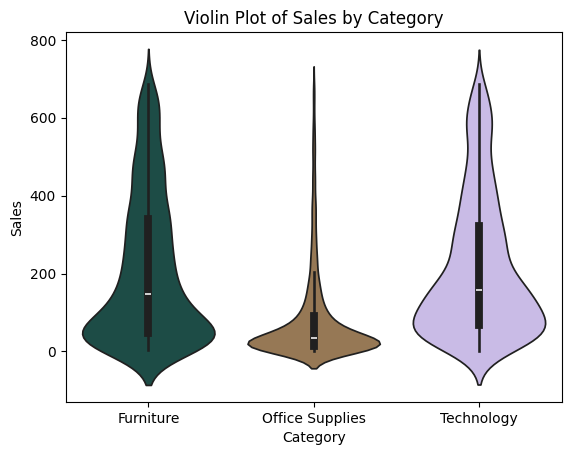

In [ ]:
sns.violinplot(x='Category', y='Sales', data=df_total_sales_filtered, palette="cubehelix")
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Violin Plot of Sales by Category')
plt.show()

Furniture and Technology categories have higher sales variability compared to Office Supplies, which is more consistent but has lower sales values.

The same procedures but for profits

In [ ]:
#cleaning outliers
profit_list = list(df_total["Profit"])
sorted_profit_list = sorted(profit_list, reverse=True)
print(sorted_profit_list)

[91585.94, 8425.18, 6921.58, 4961.21, 4736.98, 4448.46, 3224.15, 3120.63, 2808.38, 2669.08, 2599.73, 2579.35, 2408.17, 2373.08, 2291.51, 2072.65, 2041.9, 1983.52, 1779.39, 1718.25, 1649.22, 1601.45, 1560.32, 1496.72, 1483.18, 1463.58, 1421.38, 1420.97, 1419.68, 1418.38, 1403.54, 1305.85, 1302.7, 1256.43, 1224.98, 1163.47, 1123.36, 1085.99, 1081.48, 1078.49, 1067.06, 1029.05, 971.1, 947.82, 947.82, 930.91, 907.99, 902.68, 865.19, 862.56, 855.21, 850.65, 845.7, 842.76, 817.53, 810.49, 787.31, 786.19, 780.13, 779.76, 774.75, 764.91, 763.58, 759.71, 755.89, 754.22, 754.02, 743.27, 724.47, 718.13, 703.08, 702.99, 700.4, 696.59, 689.38, 680.38, 679.78, 676.67, 674.4, 661.96, 658.79, 655.26, 643.15, 640.63, 639.36, 639.22, 639.22, 637.91, 637.4, 630.9, 629.99, 620.03, 594.57, 593.89, 591.51, 587.75, 587.31, 587.09, 583.98, 562.54, 555.42, 554.38, 554.34, 551.98, 551.9, 546.05, 539.42, 537.5, 529.57, 529.19, 529.15, 526.55, 519.84, 515.37, 508.21, 507.48, 505.15, 505.14, 498.46, 495.01, 492.54

In [ ]:
print(df_total[df_total["Profit"]<-2000])

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
1928  2021-169019 2021-07-27 2021-07-31  Standard Class    LF-17185   
1998  2022-150630 2022-09-18 2022-09-22  Standard Class    TB-21520   
2666  2022-147830 2022-12-16 2022-12-19     First Class    NF-18385   
4019  2022-116638 2022-01-29 2022-02-01    Second Class    JH-15985   
6094  2023-108196 2023-11-27 2023-12-04  Standard Class    CS-12505   
7128  2024-134845 2024-04-18 2024-04-24  Standard Class    SR-20425   

        Customer Name      Segment        Country          City  \
1928    Luke Phillips     Consumer  United States   San Antonio   
1998       Tracy Ross     Consumer  United States  Philadelphia   
2666    Natalie Scott     Consumer  United States        Newark   
4019   Joseph Vasquez     Consumer  United States       Concord   
6094       Cindy Hall     Consumer  United States     Lancaster   
7128  Sharelle Howard  Home Office  United States    Louisville   

               State  ...       

In [ ]:
# Calculate the first and third quartiles of the 'Profit' column
q1 = df_total['Profit'].quantile(0.25)
q3 = df_total['Profit'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers based on the IQR
df_total_profit_filtered = df_total[(df_total['Profit'] >= lower_bound) & (df_total['Profit'] <= upper_bound)]

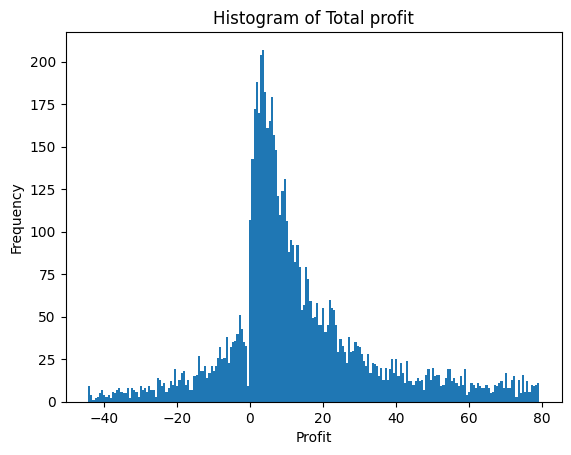

In [ ]:

plt.hist(df_total_profit_filtered['Profit'], bins=210)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Total profit')
plt.show()

<ipython-input-98-0f9f6d62732c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Profit', data=df_total_profit_filtered, palette="cubehelix")


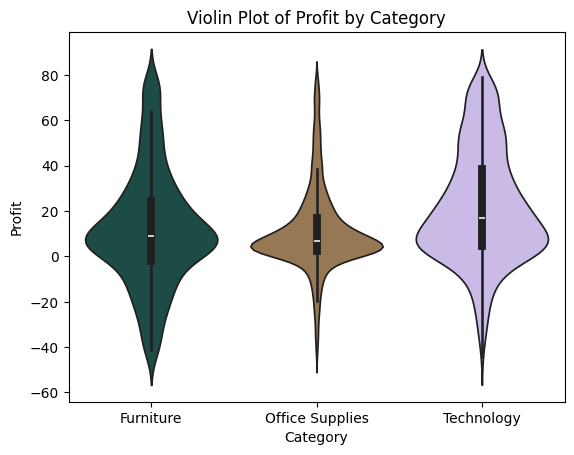

In [ ]:
sns.violinplot(x='Category', y='Profit', data=df_total_profit_filtered, palette="cubehelix")
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Violin Plot of Profit by Category')
plt.show()

 Furniture shows a wide range of profit outcomes, including both high profits and losses, while Office Supplies is more stable, and Technology offers high profits with moderate variability.

In [ ]:
# we also add a new subset of data for statistical analysis to calculate only based on first 8 months to ba able to calculate also the last year
# Filter the data to include only entries from the first 8 months (January to August)
df_total_first8 = df_total[df_total['Month'] <= 8]

# Q1 “The introduction of new systems in 2023 has improved our sales and profits significantly”


## Step 1: Exploratory Data Analysis (EDAs)



In [ ]:
#stats for profit
df_total_first8.groupby("Year")["Profit"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2021,969.0,20.558762,173.518559,-3787.04,2.050,8.580,29.00,1305.85
2022,1010.0,42.603347,267.123935,-2607.24,2.340,12.295,46.21,4448.46
2023,1307.0,97.062433,2538.128747,-1856.50,1.565,8.660,29.25,91585.94
2024,1637.0,34.352285,245.370050,-3501.98,1.800,8.890,30.24,6921.58


year   mean         growth

2021  20.56 	   | ---

2022	42.60		   | +107%

2023	97.06		   | +128%

2024	34.35		   | -64.6%

The mean profit in 2021	was 20.56, in 2022 there was an enormous growth +107%, giving a mean of 42.6. After the campaign introduction in 2023, the profit rised even higer to 97.06 (+128%). However in the 2024 the trend suddenly changed and the mean profit is now around 34.35 which is lower than before the campaign and it is a -64.6% loss.

In [ ]:
#stats for sales
df_total_first8.groupby("Year")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2021,969.0,240.680423,895.081274,0.89,17.530,51.980,211.060,23702.49
2022,1010.0,272.441733,583.200075,1.20,19.795,66.345,255.770,7753.04
2023,1307.0,349.929296,938.047023,1.28,26.530,79.400,301.285,13922.89
2024,1637.0,355.327159,928.399335,0.71,27.340,89.710,335.900,22399.94


year  mean sales | growht(%)

2021   240.68	   |  -

2022   272.44	    | +13.2%

2023   349.89	   | +28.4%

2024   355.33	    | +1.55%

Mean sales showed consistent growth year-on-year, with the largest increase of 28.4% from 2022 to 2023. The sales increase slowed in 2024, with only a 1.55% rise, indicating that while sales continued to grow, the pace of growth slowed down.

## Descriptive analytics for first question

In [ ]:
# For Sales (since normality is not met, use Mann-Whitney U test)
sales_2021_2022 = df_total_first8[(df_total_first8["Year"] == 2021) | (df_total_first8["Year"] == 2022)]["Sales"]
sales_2023_2024 = df_total_first8[(df_total_first8["Year"] == 2023) | (df_total_first8["Year"] == 2024)]["Sales"]

# Check for normality using Shapiro-Wilk test
statistic, p_value1 = stats.shapiro(sales_2021_2022)
print("\nShapiro-Wilk Test for sales (2021-2022):")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value1}")

statistic, p_value = stats.shapiro(sales_2023_2024)
print("\nShapiro-Wilk Test for sales (2023-2024):")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")
# If normality is met, use independent t-test, otherwise use Mann-Whitney U test
if p_value > 0.05 and p_value1> 0.05: # Normality assumption met
  # Perform independent t-test
  t_statistic, p_value = stats.ttest_ind(sales_2021_2022, sales_2023_2024)
  print("\nIndependent t-test for Sales 21/22 vs 23/24:")
  print(f"t-statistic: {t_statistic}")
  print(f"P-value: {p_value}")
else:
  # Perform Mann-Whitney U test
  statistic, p_value = stats.mannwhitneyu(sales_2021_2022, sales_2023_2024)
  print("\nMann-Whitney U Test for Sales 21/22 vs 23/24:")
  print(f"Statistic: {statistic}")
  print(f"P-value: {p_value}")


# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in sales between 2021-2022 and 2023-2024.")
else:
    print("There is no statistically significant difference in sales between 2021-2022 and 2023-2024.")




Shapiro-Wilk Test for sales (2021-2022):
Statistic: 0.27763631338167516
P-value: 3.2929958839337975e-66

Shapiro-Wilk Test for sales (2023-2024):
Statistic: 0.3423737269353806
P-value: 2.3958527129196243e-73

Mann-Whitney U Test for Sales 21/22 vs 23/24:
Statistic: 2589568.0
P-value: 3.6734951820709346e-11
There is a statistically significant difference in sales between 2021-2022 and 2023-2024.


In [ ]:

# For Profit (check normality and apply appropriate test)
profit_2021_2022 = df_total_first8[(df_total_first8["Year"] == 2021) | (df_total_first8["Year"] == 2022)]["Profit"]
profit_2023_2024 = df_total_first8[(df_total_first8["Year"] == 2023) | (df_total_first8["Year"] == 2024)]["Profit"]

# Check for normality using Shapiro-Wilk test
statistic, p_value1 = stats.shapiro(profit_2021_2022)
print("\nShapiro-Wilk Test for Profit (2021-2022):")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value1}")

statistic, p_value = stats.shapiro(profit_2023_2024)
print("\nShapiro-Wilk Test for Profit (2023-2024):")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# If normality is met, use independent t-test, otherwise use Mann-Whitney U test
if p_value > 0.05 and p_value1> 0.05: # Normality assumption met
  # Perform independent t-test
  t_statistic, p_value = stats.ttest_ind(profit_2021_2022, profit_2023_2024)
  print("\nIndependent t-test for Profit 21/22 vs 23/24:")
  print(f"t-statistic: {t_statistic}")
  print(f"P-value: {p_value}")

else: # Normality assumption not met
  # Perform Mann-Whitney U test
  statistic, p_value = stats.mannwhitneyu(profit_2021_2022, profit_2023_2024)
  print("\nMann-Whitney U Test for Profit 21/22 vs 23/24:")
  print(f"Statistic: {statistic}")
  print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in profit between 2021-2022 and 2023-2024.")
else:
    print("There is no statistically significant difference in profit between 2021-2022 and 2023-2024.")



Shapiro-Wilk Test for Profit (2021-2022):
Statistic: 0.3425164747439501
P-value: 1.964583810894329e-64

Shapiro-Wilk Test for Profit (2023-2024):
Statistic: 0.01755086539733386
P-value: 9.897177605239332e-82

Mann-Whitney U Test for Profit 21/22 vs 23/24:
Statistic: 3011729.0
P-value: 0.04365225042511711
There is a statistically significant difference in profit between 2021-2022 and 2023-2024.


## Step 2: Correlation analysis

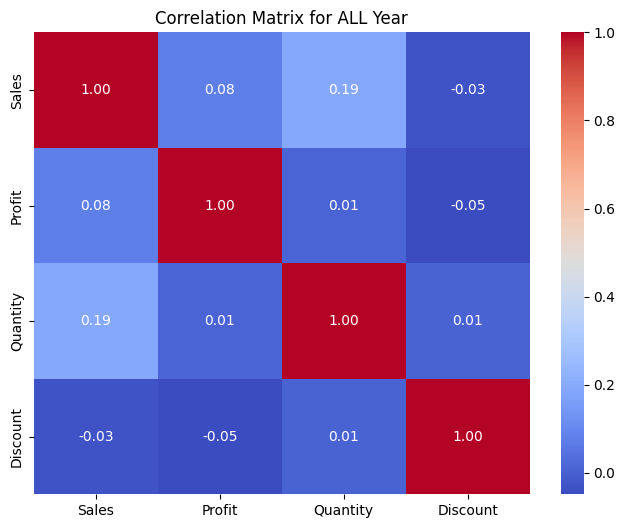

In [ ]:
# Create a correlation matrix for each year
correlation_matrix = df_total_first8[['Sales', 'Profit', 'Quantity', 'Discount']].corr()

# Plot the correlation matrix with heatmap and color based on correlation value
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f"Correlation Matrix for ALL Year")
plt.show()

In this dataset, sales, profit, quantity, and discount are relatively independent of each other, with no dominant or significant linear relationships.

## Step 3: Visual Analytics

Visual/Graphic support to support first question

We show the correlation between profits, sales, and quantity with filtered out very high profit entreis (using iqr)

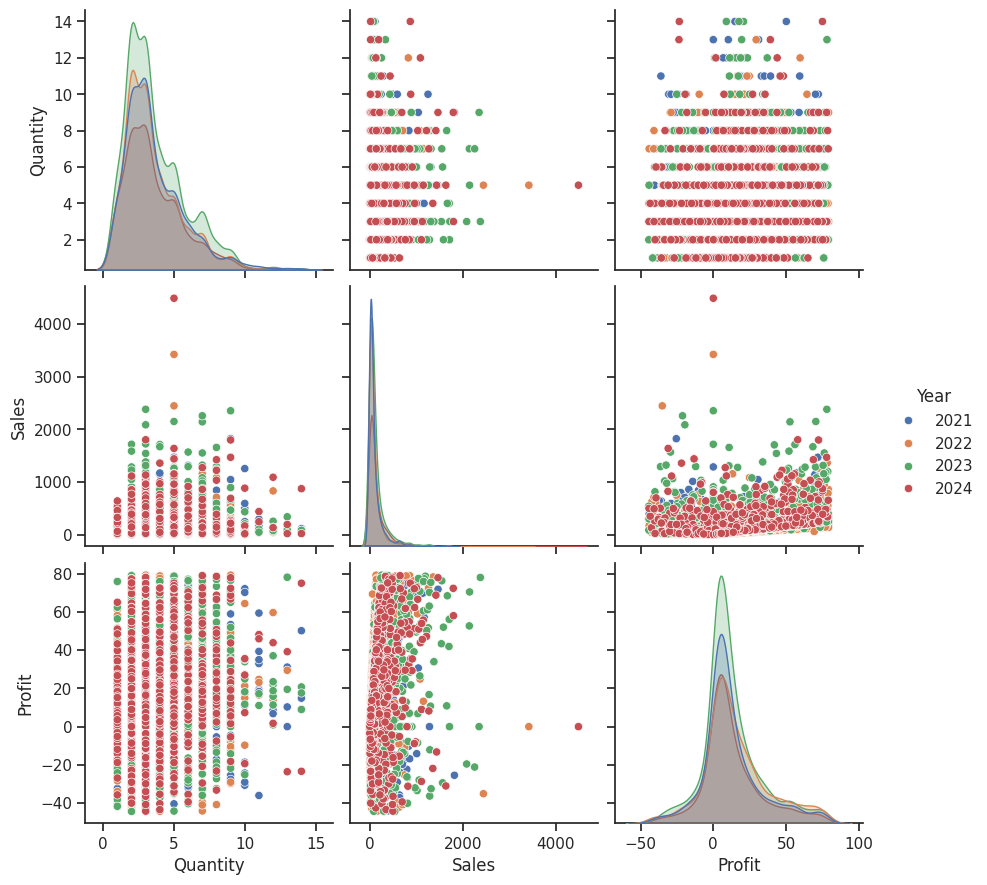

In [ ]:
cols_for_pairplot = ['Quantity', 'Sales', 'Profit', 'Year' ]
sns.set(style = 'ticks', color_codes=True)

df_pairplot = df_total_profit_filtered[cols_for_pairplot]
sns.pairplot(df_pairplot, vars=df_pairplot.columns[:-1], hue='Year', height=3, palette='deep')
plt.show()

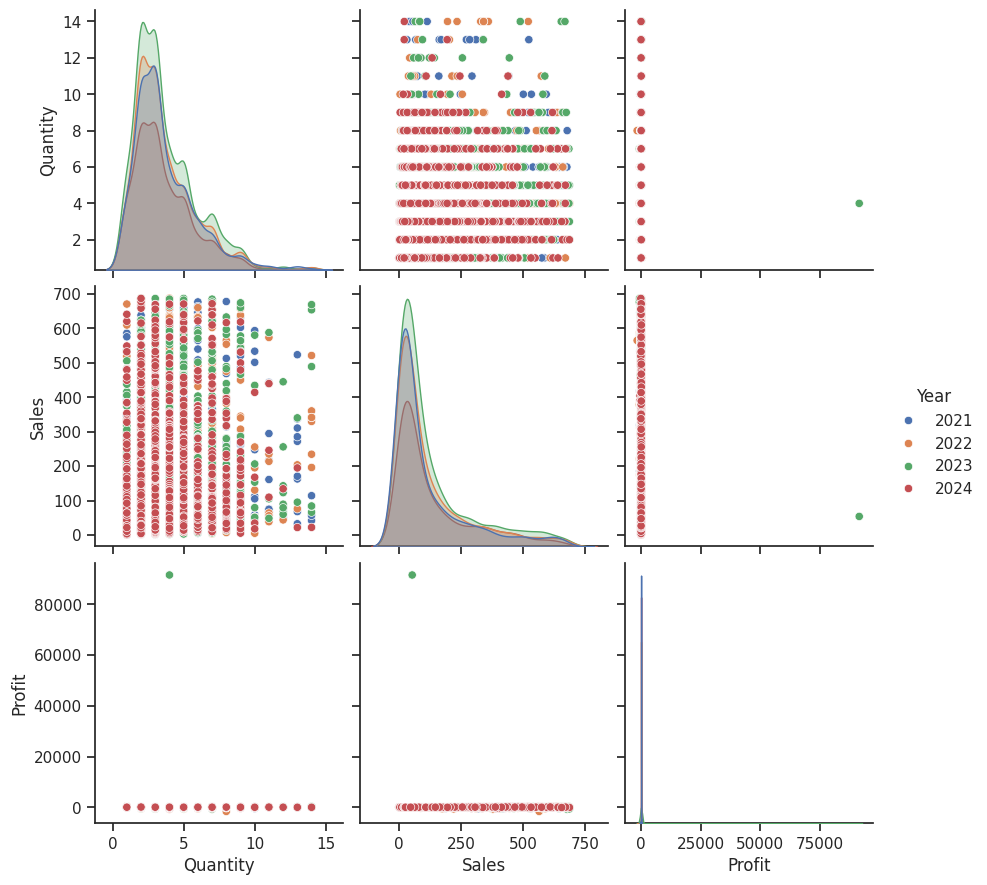

In [ ]:
cols_for_pairplot = ['Quantity', 'Sales', 'Profit', 'Year' ]
sns.set(style = 'ticks', color_codes=True)

df_pairplot = df_total_sales_filtered[cols_for_pairplot]
sns.pairplot(df_pairplot, vars=df_pairplot.columns[:-1], hue='Year', height=3, palette='deep')
plt.show()

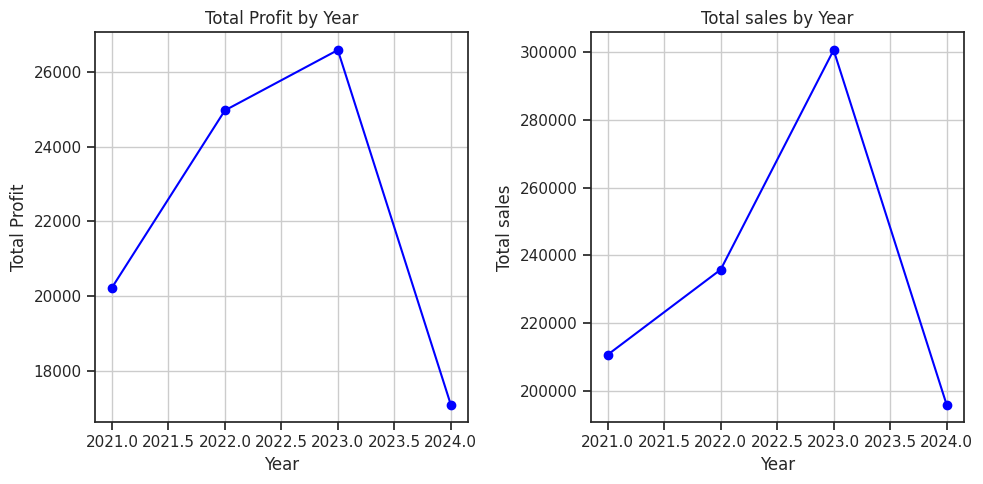

In [ ]:

Profit_per_year = df_total_profit_filtered.groupby('Year')['Profit'].sum().loc[[2021, 2022, 2023, 2024]]
sales_per_year = df_total_sales_filtered.groupby('Year')['Sales'].sum().loc[[2021, 2022, 2023, 2024]]

# Step 3: Calculate percentage change (growth)
Profit_growth_pct = Profit_per_year.pct_change() * 100
sales_growth_pct = sales_per_year.pct_change() * 100

# Step 4: Plot total sales over the years (Line plot)
plt.figure(figsize=(10, 5))

# Line plot for total sales
plt.subplot(1, 2, 1)
plt.plot(Profit_per_year.index, Profit_per_year.values, marker='o', color='blue', linestyle='-', label='Total Profit')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)

# Line plot for percentage growth
plt.subplot(1, 2, 2)
plt.plot(sales_per_year.index, sales_per_year.values, marker='o', color='blue', linestyle='-', label='Total Sales')
plt.title('Total sales by Year')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

print(Profit_growth_pct.values)
print(sales_growth_pct.values)

[         nan  23.44290777   6.46774518 -35.67572814]
[         nan  11.91377736  27.47255035 -34.79675366]


In [ ]:
Sales_2021_2022 = len(df_total_first8[(df_total_first8["Year"] == 2021) | (df_total_first8["Year"] == 2022)])

In [ ]:
Sales_2023_2024 = len(df_total_first8[(df_total_first8["Year"] == 2023) | (df_total_first8["Year"] == 2024)])

In [ ]:
(Sales_2023_2024-Sales_2021_2022)/Sales_2023_2024

0.32778532608695654

Sales in the period 2021-2022 are about 32.78% lower than sales in the period 2023-2024. Number of sales.

## Written conclusions and insights found for first question

The mean values for profit after 2023 dropped in comparison to 2022. However the mean sales rised significantly. While sales grew consistently year over year, profit did not follow the same pattern. The large profit spike in 2023 could point to one-time events or outliers driving those numbers, but the overall profitability seems to have shrunk by 2024 despite sales growth.

So it could be that there were indeed a little bit more sales done after introducing the new system in the 2023, however there are some costs that stops the profit from growing. Only number of sales grows.

Statistical tests show that both profit and sales significantly differ from before and after 2023 introduction of the campaing. However the difference may not be positive in businnes terms. Because the trend for both profits and sales is neagitve already in 2024, so that means that the business generally had a slight peak in 2023, but now is going downward.

The highest profit was at the beginning of the 2023, so before introduction of the campaing. But the higher percentiles in both sales and profit have risen, suggesting that the top-performing businesses have continued to improve, even though the average and lower-performing businesses may be facing challenges.

So it seems like indeed new systems improved the sales and profits.

In summary, the analysis suggests that while the new systems introduced in 2023 have positively impacted sales, they have not translated into proportional profit growth. The decline in profitability amidst rising sales presents a challenge for the business, indicating that operational costs and market dynamics need to be addressed.

# Q2 “2023 e-marketing campaign has boosted Technology sales and profits over all other categories”

## STATISTICAL ANALYSIS for Before and After campaign  AND outside and during campaign


In [ ]:
# Separate profits data for the Technology category BEFORE the campaign
# (2021, 2022, and Jan-Mar 2023)
tech_profit_before_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3])))
    )
]["Profit"]

# Separate profits data for the Technology category AFTER the campaign
# (Aug-Dec 2023 and all of 2024)
tech_profit_after_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Profit"]

# Check for normality in both before and after data
stat_before, p_value_before = stats.shapiro(tech_profit_before_campaign)
stat_after, p_value_after = stats.shapiro(tech_profit_after_campaign)

# If normality is met, use independent t-test, otherwise use Mann-Whitney U test
if p_value_before > 0.05 and p_value_after > 0.05:  # Normality assumption met
    # Perform independent t-test
    t_statistic, p_value = stats.ttest_ind(tech_profit_before_campaign, tech_profit_after_campaign)
    print("\nIndependent t-test for Technology Profit Before vs After Campaign:")
else:  # Normality assumption not met
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(tech_profit_before_campaign, tech_profit_after_campaign)
    print("\nMann-Whitney U Test for Technology Profit Before vs After Campaign:")

# Print p-value
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in profits for Technology before and after the campaign.")
else:
    print("There is no statistically significant difference in profits for Technology before and after the campaign.")



Mann-Whitney U Test for Technology Profit Before vs After Campaign:
P-value: 0.026481304005744326
There is a statistically significant difference in profits for Technology before and after the campaign.


In [ ]:
# Separate sales data for the Technology category BEFORE the campaign
# (2021, 2022, and Jan-Mar 2023)
tech_sales_before_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3])))
    )
]["Sales"]

# Separate sales data for the Technology category AFTER the campaign
# (Aug-Dec 2023 and all of 2024)
tech_sales_after_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Sales"]

# Check for normality in both before and after data
stat_before, p_value_before = stats.shapiro(tech_sales_before_campaign)
stat_after, p_value_after = stats.shapiro(tech_sales_after_campaign)

# If normality is met, use independent t-test, otherwise use Mann-Whitney U test
if p_value_before > 0.05 and p_value_after > 0.05:  # Normality assumption met
    # Perform independent t-test
    t_statistic, p_value = stats.ttest_ind(tech_sales_before_campaign, tech_sales_after_campaign)
    print("\nIndependent t-test for Technology Profit Before vs After Campaign:")
else:  # Normality assumption not met
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(tech_sales_before_campaign, tech_sales_after_campaign)
    print("\nMann-Whitney U Test for Technology Profit Before vs After Campaign:")

# Print p-value
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in sales for Technology before and after the campaign.")
else:
    print("There is no statistically significant difference in sales for Technology before and after the campaign.")



Mann-Whitney U Test for Technology Profit Before vs After Campaign:
P-value: 0.0013638139149487094
There is a statistically significant difference in sales for Technology before and after the campaign.


In [ ]:
# Separate profits data for the Technology category OUTSIDE the campaign
# (2021, 2022, Jan-Mar 2023, Aug-Dec 2023, all of 2024)
tech_profit_outside_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3, 8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Profit"]

# Separate profits data for the Technology category DURING the campaign (Apr-Jul 2023)
tech_profit_during_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (df_total["Year"] == 2023) &
    (df_total["Month"].isin([4, 5, 6, 7]))
]["Profit"]

# Check for normality in both datasets
stat_outside, p_value_outside = stats.shapiro(tech_profit_outside_campaign)
stat_during, p_value_during = stats.shapiro(tech_profit_during_campaign)

# If normality is met, use independent t-test, otherwise use Mann-Whitney U test
if p_value_outside > 0.05 and p_value_during > 0.05:  # Normality assumption met
    # Perform independent t-test
    t_statistic, p_value = stats.ttest_ind(tech_profit_outside_campaign, tech_profit_during_campaign)
    print("\nIndependent t-test for Technology Profit Outside vs During Campaign:")
else:  # Normality assumption not met
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(tech_profit_outside_campaign, tech_profit_during_campaign)
    print("\nMann-Whitney U Test for Technology Profit Outside vs During Campaign:")

# Print p-value
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in profits for Technology outside and during the campaign.")
else:
    print("There is no statistically significant difference in profits for Technology outside and during the campaign.")



Mann-Whitney U Test for Technology Profit Outside vs During Campaign:
P-value: 0.42974572024577884
There is no statistically significant difference in profits for Technology outside and during the campaign.


In [ ]:
# Separate Sales data for the Technology category OUTSIDE the campaign
# (2021, 2022, Jan-Mar 2023, Aug-Dec 2023, all of 2024)
tech_sales_outside_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3, 8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Sales"]

# Separate Sales data for the Technology category DURING the campaign (Apr-Jul 2023)
tech_Sales_during_campaign = df_total[
    (df_total["Category"] == "Technology") &
    (df_total["Year"] == 2023) &
    (df_total["Month"].isin([4, 5, 6, 7]))
]["Sales"]

# Check for normality in both datasets
stat_outside, p_value_outside = stats.shapiro(tech_sales_outside_campaign)
stat_during, p_value_during = stats.shapiro(tech_Sales_during_campaign)

# If normality is met, use independent t-test, otherwise use Mann-Whitney U test
if p_value_outside > 0.05 and p_value_during > 0.05:  # Normality assumption met
    # Perform independent t-test
    t_statistic, p_value = stats.ttest_ind(tech_sales_outside_campaign, tech_Sales_during_campaign)
    print("\nIndependent t-test for Technology Profit Outside vs During Campaign:")
else:  # Normality assumption not met
    # Perform Mann-Whitney U test
    statistic, p_value = stats.mannwhitneyu(tech_sales_outside_campaign, tech_Sales_during_campaign)
    print("\nMann-Whitney U Test for Technology Profit Outside vs During Campaign:")

# Print p-value
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in sales for Technology outside and during the campaign.")
else:
    print("There is no statistically significant difference in sales for Technology outside and during the campaign.")



Mann-Whitney U Test for Technology Profit Outside vs During Campaign:
P-value: 0.3683846471263811
There is no statistically significant difference in sales for Technology outside and during the campaign.


In [ ]:
# For Office Supplies
# Separate profits data for Office Supplies category OUTSIDE the campaign
# (2021, 2022, Jan-Mar 2023, Aug-Dec 2023, all of 2024)
office_supplies_outside_campaign = df_total[
    (df_total["Category"] == "Office Supplies") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3, 8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Profit"]

# Separate profits data for Office Supplies DURING the campaign (Apr-Jul 2023)
office_supplies_during_campaign = df_total[
    (df_total["Category"] == "Office Supplies") &
    (df_total["Year"] == 2023) &
    (df_total["Month"].isin([4, 5, 6, 7]))
]["Profit"]

# For Furniture
# Separate profits data for Furniture category OUTSIDE the campaign
furniture_outside_campaign = df_total[
    (df_total["Category"] == "Furniture") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3, 8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Profit"]

# Separate profits data for Furniture DURING the campaign (Apr-Jul 2023)
furniture_during_campaign = df_total[
    (df_total["Category"] == "Furniture") &
    (df_total["Year"] == 2023) &
    (df_total["Month"].isin([4, 5, 6, 7]))
]["Profit"]

# Function to perform the test and print results
def perform_test(category_name, outside_data, during_data):
    # Check for normality
    stat_outside, p_value_outside = stats.shapiro(outside_data)
    stat_during, p_value_during = stats.shapiro(during_data)

    # Choose appropriate test based on normality
    if p_value_outside > 0.05 and p_value_during > 0.05:  # Normality assumption met
        # Perform independent t-test
        t_statistic, p_value = stats.ttest_ind(outside_data, during_data)
        print(f"\nIndependent t-test for {category_name} Profit Outside vs During Campaign:")
    else:  # Normality assumption not met
        # Perform Mann-Whitney U test
        statistic, p_value = stats.mannwhitneyu(outside_data, during_data)
        print(f"\nMann-Whitney U Test for {category_name} Profit Outside vs During Campaign:")

    # Print p-value
    print(f"P-value: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"There is a statistically significant difference in profits for {category_name} outside and during the campaign.")
    else:
        print(f"There is no statistically significant difference in profits for {category_name} outside and during the campaign.")

# Perform tests for both Office Supplies and Furniture
perform_test("Office Supplies", office_supplies_outside_campaign, office_supplies_during_campaign)
perform_test("Furniture", furniture_outside_campaign, furniture_during_campaign)



Mann-Whitney U Test for Office Supplies Profit Outside vs During Campaign:
P-value: 0.022981115883241237
There is a statistically significant difference in profits for Office Supplies outside and during the campaign.

Mann-Whitney U Test for Furniture Profit Outside vs During Campaign:
P-value: 0.4669131369358329
There is no statistically significant difference in profits for Furniture outside and during the campaign.


In [ ]:
from scipy import stats

# For Office Supplies (Sales data)
# Separate sales data for Office Supplies category OUTSIDE the campaign
# (2021, 2022, Jan-Mar 2023, Aug-Dec 2023, all of 2024)
office_supplies_sales_outside_campaign = df_total[
    (df_total["Category"] == "Office Supplies") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3, 8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Sales"]

# Separate sales data for Office Supplies DURING the campaign (Apr-Jul 2023)
office_supplies_sales_during_campaign = df_total[
    (df_total["Category"] == "Office Supplies") &
    (df_total["Year"] == 2023) &
    (df_total["Month"].isin([4, 5, 6, 7]))
]["Sales"]

# For Furniture (Sales data)
# Separate sales data for Furniture category OUTSIDE the campaign
furniture_sales_outside_campaign = df_total[
    (df_total["Category"] == "Furniture") &
    (
        (df_total["Year"] == 2021) |
        (df_total["Year"] == 2022) |
        ((df_total["Year"] == 2023) & (df_total["Month"].isin([1, 2, 3, 8, 9, 10, 11, 12]))) |
        (df_total["Year"] == 2024)
    )
]["Sales"]

# Separate sales data for Furniture DURING the campaign (Apr-Jul 2023)
furniture_sales_during_campaign = df_total[
    (df_total["Category"] == "Furniture") &
    (df_total["Year"] == 2023) &
    (df_total["Month"].isin([4, 5, 6, 7]))
]["Sales"]

# Function to perform the test and print results for Sales
def perform_sales_test(category_name, outside_data, during_data):
    # Check for normality
    stat_outside, p_value_outside = stats.shapiro(outside_data)
    stat_during, p_value_during = stats.shapiro(during_data)

    # Choose appropriate test based on normality
    if p_value_outside > 0.05 and p_value_during > 0.05:  # Normality assumption met
        # Perform independent t-test
        t_statistic, p_value = stats.ttest_ind(outside_data, during_data)
        print(f"\nIndependent t-test for {category_name} Sales Outside vs During Campaign:")
    else:  # Normality assumption not met
        # Perform Mann-Whitney U test
        statistic, p_value = stats.mannwhitneyu(outside_data, during_data)
        print(f"\nMann-Whitney U Test for {category_name} Sales Outside vs During Campaign:")

    # Print p-value
    print(f"P-value: {p_value}")

    # Interpretation
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"There is a statistically significant difference in sales for {category_name} outside and during the campaign.")
    else:
        print(f"There is no statistically significant difference in sales for {category_name} outside and during the campaign.")

# Perform sales tests for both Office Supplies and Furniture
perform_sales_test("Office Supplies", office_supplies_sales_outside_campaign, office_supplies_sales_during_campaign)
perform_sales_test("Furniture", furniture_sales_outside_campaign, furniture_sales_during_campaign)



Mann-Whitney U Test for Office Supplies Sales Outside vs During Campaign:
P-value: 0.15739815363470233
There is no statistically significant difference in sales for Office Supplies outside and during the campaign.

Mann-Whitney U Test for Furniture Sales Outside vs During Campaign:
P-value: 0.3882060518108311
There is no statistically significant difference in sales for Furniture outside and during the campaign.


In [ ]:
# Calculate median for Office Supplies profits outside and during the campaign
median_outside = office_supplies_outside_campaign.median()
median_during = office_supplies_during_campaign.median()

print(f"Median profit outside the campaign: {median_outside}")
print(f"Median profit during the campaign: {median_during}")

# Alternatively, calculate mean values
mean_outside = office_supplies_outside_campaign.mean()
mean_during = office_supplies_during_campaign.mean()

print(f"Mean profit outside the campaign: {mean_outside}")
print(f"Mean profit during the campaign: {mean_during}")


Median profit outside the campaign: 7.76
Median profit during the campaign: 6.49
Mean profit outside the campaign: 25.416685131841348
Mean profit during the campaign: 9.194043824701197


ANOVA test to check if the differences in sales for Technology are statistically significant compared to Office Supplies and Furniture

In [ ]:
from scipy.stats import f_oneway
sales_tech = df_total_first8[df_total_first8['Category'] == 'Technology']['Sales']
sales_office = df_total_first8[df_total_first8['Category'] == 'Office Supplies']['Sales']
sales_furniture = df_total_first8[df_total_first8['Category'] == 'Furniture']['Sales']

print(sales_tech.mean(), sales_office.mean(), sales_furniture.mean())
print(sales_tech.median(), sales_office.median(), sales_furniture.median())
f_oneway(sales_tech, sales_office, sales_furniture)

643.8507040704071 167.0676188892584 456.5849155908639
244.78 38.26 244.68


F_onewayResult(statistic=129.3396836937551, pvalue=1.8003475077502295e-55)

There is a statistically significant difference in sales between the Technology, Office Supplies, and Furniture categories. But technology does not differ that much from furniture in terms of sales

In [ ]:
from scipy.stats import f_oneway
Profit_tech = df_total_first8[df_total_first8['Category'] == 'Technology']['Profit']
Profit_office = df_total_first8[df_total_first8['Category'] == 'Office Supplies']['Profit']
Profit_furniture = df_total_first8[df_total_first8['Category'] == 'Furniture']['Profit']

print(Profit_tech.mean(), Profit_office.mean(), Profit_furniture.mean())
print(Profit_tech.median(), Profit_office.median(), Profit_furniture.median())
f_oneway(Profit_tech, Profit_office, Profit_furniture)

188.53129812981294 22.92315264383106 5.701330685203574
28.22 7.29 7.52


F_onewayResult(statistic=6.189005025056929, pvalue=0.002067877135141938)

There is a significantly higher profit from technology compared to other categories (overall)

In [ ]:
from scipy.stats import f_oneway
Profit_tech23 = df_total_first8[(df_total_first8['Category'] == 'Technology') & (df_total_first8['Year']==2023)]['Profit']
Profit_office23 = df_total_first8[(df_total_first8['Category'] == 'Office Supplies')& (df_total_first8['Year']==2023)]['Profit']
Profit_furniture23 = df_total_first8[(df_total_first8['Category'] == 'Furniture')& (df_total_first8['Year']==2023)]['Profit']

print(Profit_tech23.mean(), Profit_office23.mean(), Profit_furniture23.mean())
print(Profit_tech23.median(), Profit_office23.median(), Profit_furniture23.median())
f_oneway(Profit_tech23, Profit_office23, Profit_furniture23)

463.8559259259258 13.960713391739676 11.279245283018868
21.6 6.89 8.33


F_onewayResult(statistic=3.1271888022705476, pvalue=0.04416983338780651)

And  also for profit in 2023  it is stsatistically higher than the other categories.

## Statystical analysis conclusion

 The campaign itself (April to July 2023) did not have a statistically significant immediate effect on technology profits or sales when compared to outside the campaign periods. However there were significant differences during campaign for profits in office supplies. This difference however is lower than normally it would be.

 Before and after campaing profits and sales in technology also shows significant changes, however there are also significant changes in sales before and after campaign for other categories, so it is not that easy to state if the campaign boosted techonlogy category over the rest.

 For profits in 2023 technology has a significantly higher both means and medials than any other categories (tech:463.8559259259258, offic:13.960713391739676, furn:11.279245283018868), which could indicate that it was boosted more than other categories.

However, the campaign itself did not seem to create a statistically significant immediate boost in Technology profits, as they were already high compared to other categories before the campaign.

## Step 2: Correlation Analysis

See the disounts and how they affect the profits before and after campaing.
 If discounts increased in 2023 and 2024 for Technology but profits remained strong, it could indicate a successful campaign that balanced discounts with profitability.

In [ ]:
df_tech = df_total_first8[(df_total_first8['Category'] == 'Technology') & (df_total_first8['Year']==2023)]
tech_correlation_in = df_tech[['Discount', 'Sales', 'Profit']].corr()
print(tech_correlation_in)

          Discount     Sales    Profit
Discount  1.000000  0.017642 -0.074458
Sales     0.017642  1.000000  0.020956
Profit   -0.074458  0.020956  1.000000


In [ ]:
# this is with not filtered out data
df_tech = df_total_first8[(df_total_first8['Category'] == 'Technology') & (df_total_first8['Year'].isin([2021, 2022, 2024]))]
tech_correlation_out = df_tech[['Discount', 'Sales', 'Profit']].corr()
print(tech_correlation_out)

          Discount     Sales    Profit
Discount  1.000000  0.080011 -0.259867
Sales     0.080011  1.000000  0.468678
Profit   -0.259867  0.468678  1.000000


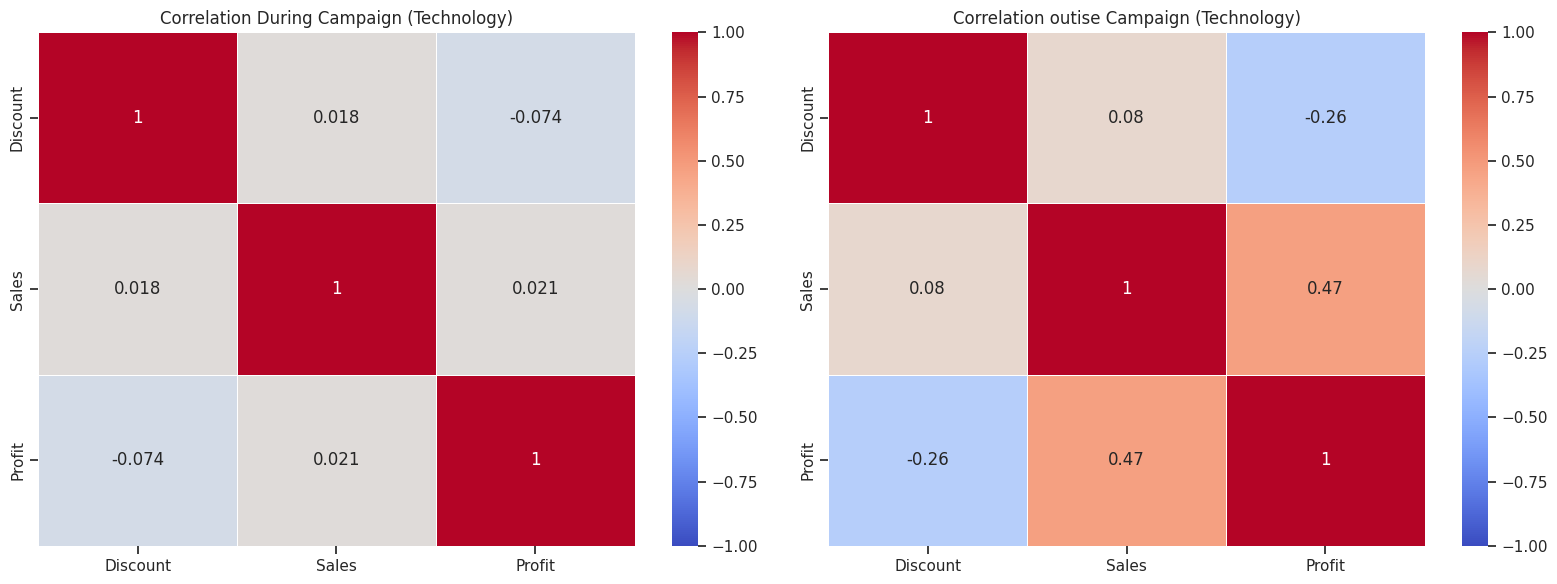

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot tech_correlation_in
sns.heatmap(tech_correlation_in, annot=True, cmap='coolwarm', ax=axes[0], vmin=-1, vmax=1, linewidths=0.5)
axes[0].set_title('Correlation During Campaign (Technology)')

# Plot tech_correlation_out
sns.heatmap(tech_correlation_out, annot=True, cmap='coolwarm', ax=axes[1], vmin=-1, vmax=1, linewidths=0.5)
axes[1].set_title('Correlation outise Campaign (Technology)')

plt.tight_layout()
plt.show()

In [ ]:
df_tech = df_tech = df_total_first8[(df_total_first8['Category'] == 'Technology') & (df_total_first8['Year'].isin([2021, 2022]))]
tech_correlation_before = df_tech[['Discount', 'Sales', 'Profit']].corr()
print(tech_correlation_before)

          Discount     Sales    Profit
Discount  1.000000  0.146919 -0.316263
Sales     0.146919  1.000000 -0.060075
Profit   -0.316263 -0.060075  1.000000


In [ ]:
df_tech = df_total_first8[(df_total_first8['Category'] == 'Technology') & (df_total_first8['Year']==2024)]
tech_correlation_after= df_tech[['Discount', 'Sales', 'Profit']].corr()
print(tech_correlation_after)

          Discount     Sales    Profit
Discount  1.000000  0.013417 -0.247346
Sales     0.013417  1.000000  0.756811
Profit   -0.247346  0.756811  1.000000


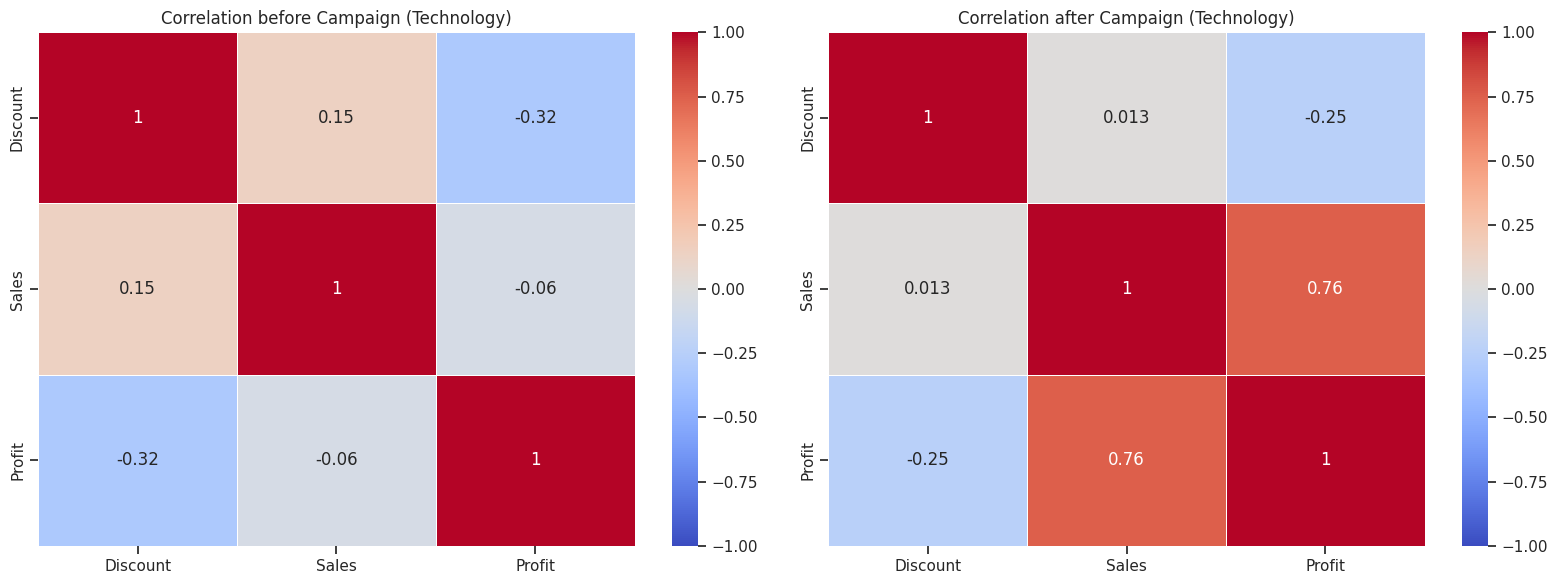

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot tech_correlation_in
sns.heatmap(tech_correlation_before, annot=True, cmap='coolwarm', ax=axes[0], vmin=-1, vmax=1, linewidths=0.5)
axes[0].set_title('Correlation before Campaign (Technology)')

# Plot tech_correlation_out
sns.heatmap(tech_correlation_after, annot=True, cmap='coolwarm', ax=axes[1], vmin=-1, vmax=1, linewidths=0.5)
axes[1].set_title('Correlation after Campaign (Technology)')

plt.tight_layout()
plt.show()

Discounts are less impactful on sales during campaigns and also they hurt profits more outside campaigns, probably because there’s no campaign effect to counterbalance the reduction in profit margin.

Sales contribute more to profits outside campaigns, but the relationship weakens significantly during the campaign, possibly due to the cost of discounts or other factors absorbing profit.

This suggests that campaigns might temporarily mask the negative impact of discounts on profit, while outside campaigns, discounting has a clearer, more detrimental effect on profitability.



The corellation between discounts and profit did not improved after the campaign. Now it is slightly less negative which means that before, the higher discount, the lower profit, but now it a bit higher profit. On the other hand the profit is now highly correlated with sales (0.76) which suprisingly was not the case before (-0.06). So after the campaign the more we sell, the more we earn, but before there was almost no correlation between those two factors.

## Visual Analysis

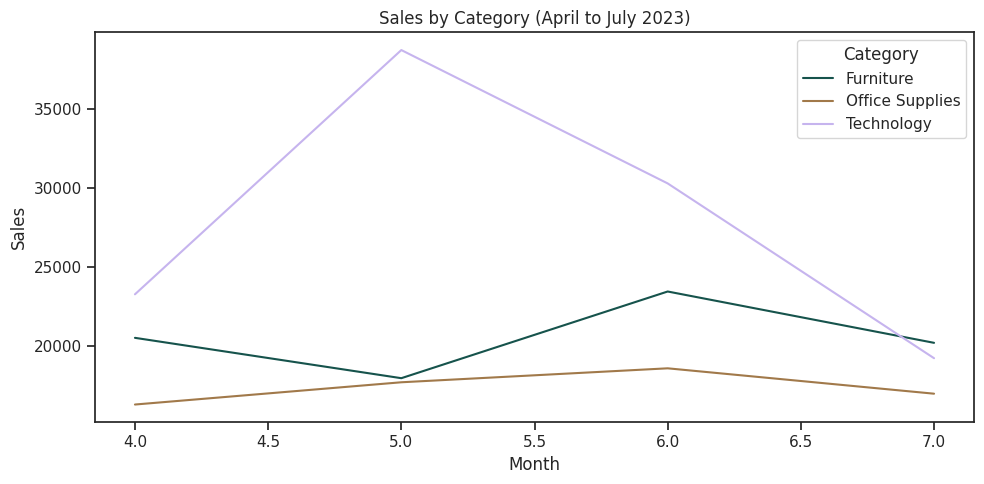

In [ ]:
# Filter for year 2023 and months between 4 and 8
df_total_2023_4to8 = df_total[(df_total['Year'] == 2023) & (df_total['Month'] >= 4) & (df_total['Month'] <= 7)]

# Group the filtered data by 'Year' and 'Category' and aggregate Sales and Profit
annual_performance = df_total_2023_4to8.groupby(['Month', 'Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(10, 5))  # Create a single figure with the desired size

# Line plot for Sales by Category
sns.lineplot(data=annual_performance, x='Month', y='Sales', hue='Category', palette="cubehelix")

# Set the title for the plot
plt.title('Sales by Category (April to July 2023)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot


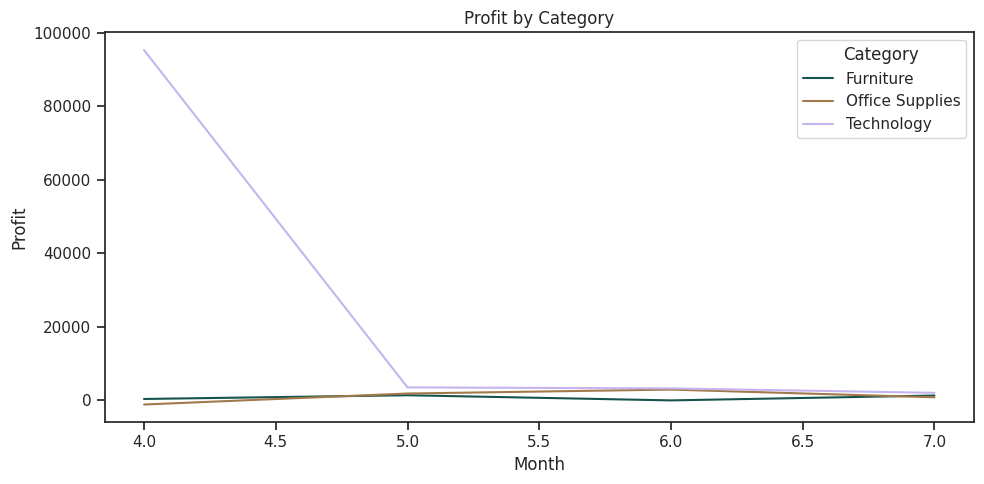

In [ ]:
plt.figure(figsize=(10, 5))  # Create a single figure with the desired size

# Line plot for Sales by Category
sns.lineplot(data=annual_performance, x='Month', y='Profit', hue='Category', palette="cubehelix")

# Set the title for the plot
plt.title('Profit by Category')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the plot

From visual analysis it seems like during the campaign technology category had a peak in sales, but profit was worse than at the start of the campaign, suggesting that campaign was not as good for the company as it may have been predicted.

The visual data shows that Technology sales peaked during the campaign, suggesting a temporary surge, but this was not accompanied by a similar profit spike, potentially indicating heavy discounting, or other campaign related costs that stopped profit from rising.

Office Supplies and Furniture categories exhibited relatively flat trends in both sales and profits, showing that these categories were not as affected by the campaign.

## Answer to the second question

The e-marketing campaign in 2023 boosted Technology sales significantly during the campaign period but did not appear to have a long-lasting or significant impact on Technology profits. Additionally, the campaign did not give Technology a clear advantage over other categories in terms of long-term profit growth. The correlation shift after the campaign suggests that profits are now more closely tied to sales than before, indicating that the campaign may have created a new dynamic where increased sales contribute more directly to profit. However, discounting strategies likely eroded short-term profitability gains during the campaign.




Before and after the campaign, significant changes were observed in sales for all categories, not just Technology. This makes it difficult to claim a unique campaign-driven advantage for Technology over the other categories. Office Supplies and Furniture did not experience significant boosts in sales or profits during the campaign.

# Q3 “Office supplies are our most profitable product category ”

## Step 1: Exploratory Data Analysis (EDAs)

In [ ]:
df_total_first8.groupby("Category")["Profit"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,1007.0,5.701331,155.872690,-2607.24,-14.540,7.52,32.53,1078.49
Office Supplies,3007.0,22.923153,171.178992,-3787.04,2.155,7.29,21.77,4448.46
Technology,909.0,188.531298,3056.563082,-3501.98,6.480,28.22,83.56,91585.94


In [ ]:
df_total_first8.groupby("Category")["profit_margin"].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,1007.0,-450.883585,653.506496,-7850.37,-598.375,-244.51,-53.240,-2.63
Office Supplies,3007.0,-144.144466,457.394545,-8237.43,-90.540,-29.61,-12.045,-1.32
Technology,909.0,-455.319406,3364.694875,-25555.22,-514.650,-202.08,-81.180,91532.21


Technology has the highest potential for profit but is very risky, with significant variability in both profit and margin.

Office Supplies is relatively stable with lower risks, although margins are still generally negative.

Furniture is the worst category, negative trends low profit margins.

So Office Supplies does not seem like the most profitable category.

## Step 2: Correlation Analysis

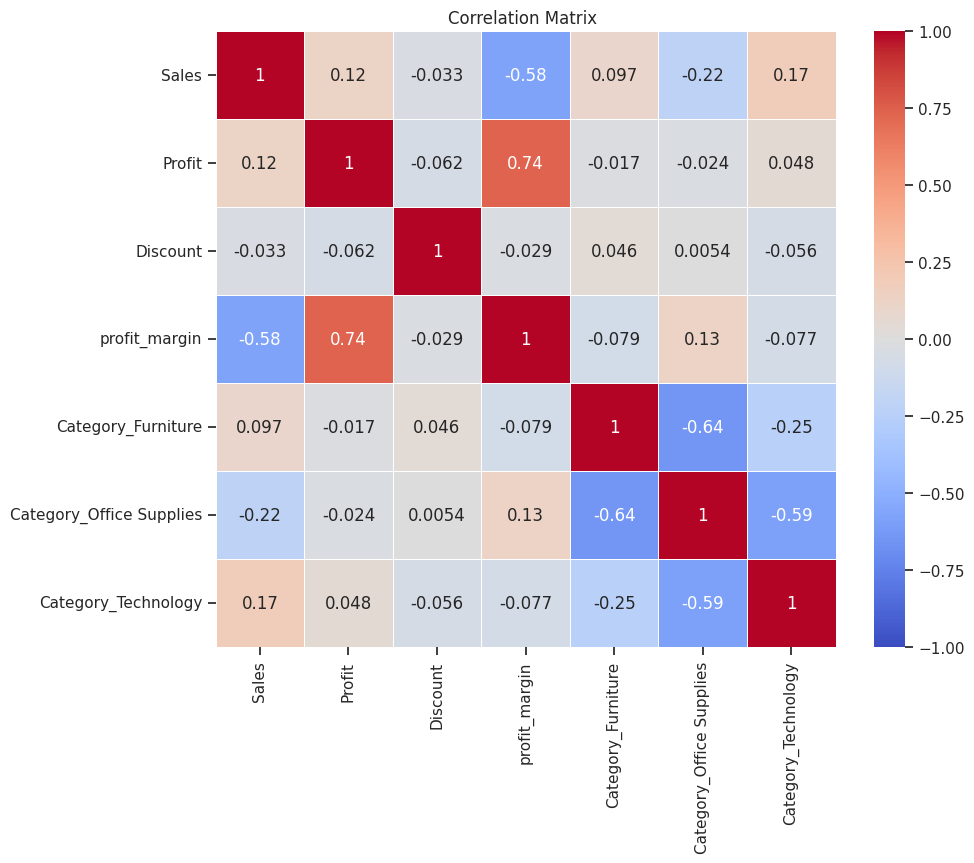

In [ ]:
# One-hot encode the 'Category' column
df_encoded = pd.get_dummies(df_total, columns=['Category'], drop_first=False)

# Calculate the correlation matrix with the encoded dataframe
corr_matrix = df_encoded[['Sales', 'Profit', 'Discount','profit_margin'] + [col for col in df_encoded.columns if 'Category_' in col]].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix ')
plt.show()


In [ ]:
corr_matrix

,Sales,Profit,Discount,profit_margin,Category_Furniture,Category_Office Supplies,Category_Technology
Sales,1.000000,0.123713,-0.032918,-0.576886,0.096517,-0.217278,0.172470
Profit,0.123713,1.000000,-0.061905,0.739182,-0.016632,-0.024287,0.048220
Discount,-0.032918,-0.061905,1.000000,-0.028615,0.046089,0.005434,-0.055506
profit_margin,-0.576886,0.739182,-0.028615,1.000000,-0.079199,0.127479,-0.077366
Category_Furniture,0.096517,-0.016632,0.046089,-0.079199,1.000000,-0.640904,-0.246234
Category_Office Supplies,-0.217278,-0.024287,0.005434,0.127479,-0.640904,1.000000,-0.586174
Category_Technology,0.172470,0.048220,-0.055506,-0.077366,-0.246234,-0.586174,1.000000


Technology is the only category with a positive correlation to profit. This could be due to higher unit prices, larger volumes, or a strong market demand for technology products. However, the negative correlation to profit margin implies that while Technology products generate high profits, they come at the cost of low or shrinking margins.

 Office supplies are the only category with positive correlation to profit margin, while the absolute profits in this category may not be as high as Technology, it tends to have better profit margins. This means Office Supplies are sold with relatively higher markups or lower costs compared to sales. The negative correlation to profit means that Office Supplies do not contribute significantly to total profits.


## Step 3: Visual Analysis

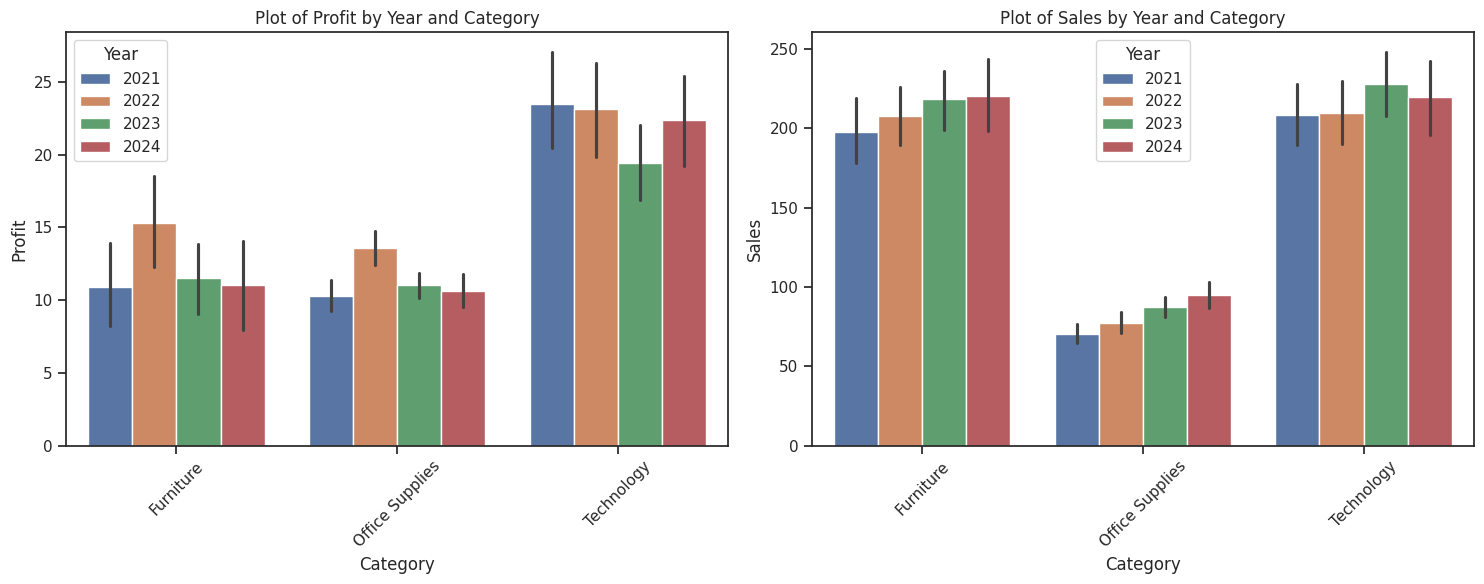

                           Sales      Profit
Year Category                               
2021 Furniture        365.978426    8.495888
     Office Supplies  125.074446   14.034479
     Technology       511.685868   58.424491
2022 Furniture        441.646376   -6.564954
     Office Supplies  146.650635   38.764013
     Technology       470.052371  109.688969
2023 Furniture        522.404038   11.279245
     Office Supplies  165.967860   13.960713
     Technology       766.716872  463.855926
2024 Furniture        467.789847    7.674954
     Office Supplies  205.370040   25.973701
     Technology       728.873410   90.562000


In [ ]:

import matplotlib.pyplot as plt
# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for Profit by Year and Category
sns.barplot(x='Category', y='Profit', hue='Year', data=df_total_profit_filtered, ax=axes[0], palette='deep')
axes[0].set_title('Plot of Profit by Year and Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Profit')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Boxplot for Sales by Year and Category
sns.barplot(x='Category', y='Sales', hue='Year', data=df_total_sales_filtered, ax=axes[1], palette='deep')
axes[1].set_title('Plot of Sales by Year and Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Sales')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# Group data by Year, Category, and calculate the mean Sales and Profit
category_sales_profit = df_total_first8.groupby(['Year', 'Category'])[['Sales', 'Profit']].mean()

print(category_sales_profit)

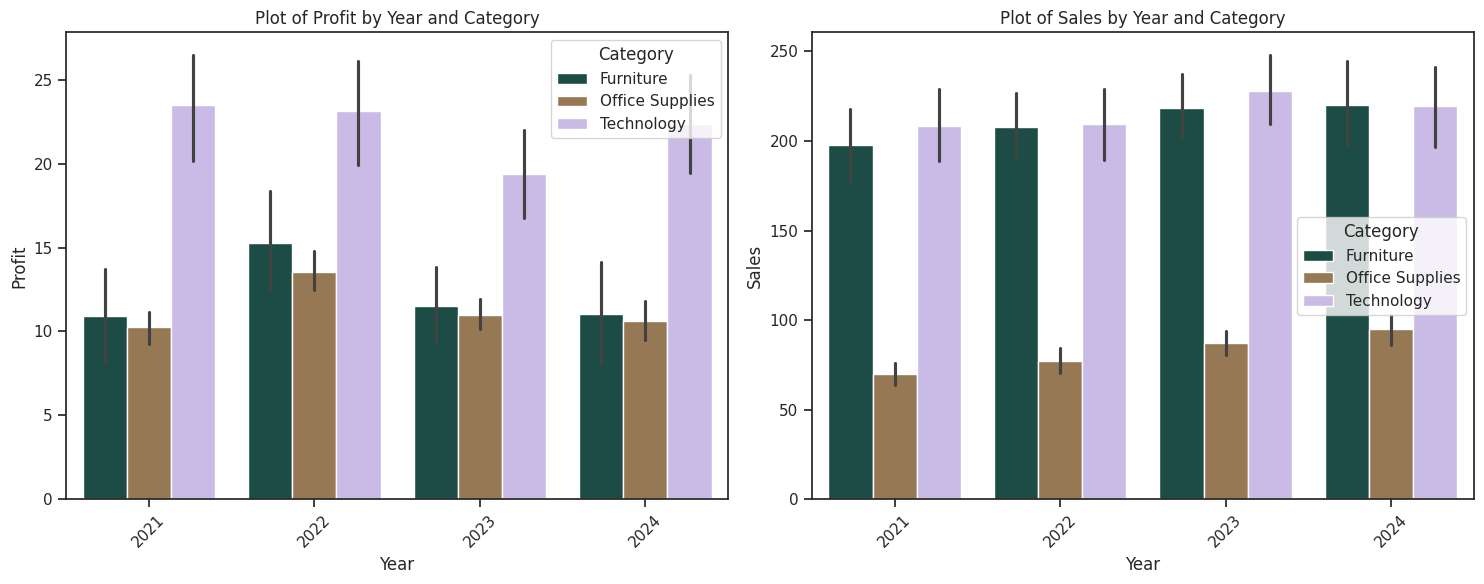

In [ ]:
# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# using the filtered data by iqr for visualization purposes because of enormously
#high signle sales that would distort the scale and make it not readible

# Plot for Profit by Year and Category
sns.barplot(x='Year', y='Profit', hue='Category', data=df_total_profit_filtered, ax=axes[0], palette="cubehelix")
axes[0].set_title('Plot of Profit by Year and Category')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Profit')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Plot for Sales by Year and Category
sns.barplot(x='Year', y='Sales', hue='Category', data=df_total_sales_filtered, ax=axes[1], palette="cubehelix")
axes[1].set_title('Plot of Sales by Year and Category')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

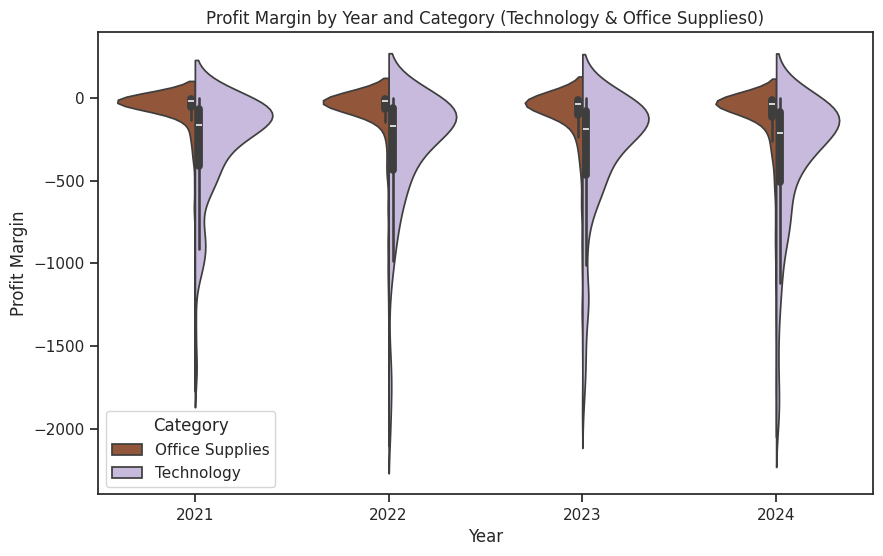

In [ ]:
# Filter the data for Technology and Office Supplies categories, and for profit margins less than 8000
df_tech_office = df_total_first8[(df_total_first8['Category'].isin(['Technology', 'Office Supplies'])) &
                                 #setting the boundaries so that plot scale is readible
                                 (df_total_first8['Profit'] < 8000) & (df_total_first8['profit_margin'] > -2000)]

# Create a violin plot for profit margin by year and category
plt.figure(figsize=(10, 6))
custom_palette = {'Technology': [0.777, 0.706, 0.89], 'Office Supplies': 'sienna'}
sns.violinplot(x='Year', y='profit_margin', hue='Category', data=df_tech_office, split=True, palette=custom_palette)
plt.title('Profit Margin by Year and Category (Technology & Office Supplies0)')
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.show()


The median profit margin for Technology is consistently higher than that of Office Supplies across all four years. This suggests that, on average, Technology products generate better profit margins, meaning the company is making more money per sale in this category.

Technology is the more profitable category in terms of potential for higher margins. However, this comes with more risk and variability, as seen in the wider distribution of both positive profits and negative losses.

On the other hand, Office Supplies is a more consistent category. While it shows lower profitability, it also comes with lower risk, making it a stable source of income with fewer extreme fluctuations. This category is less likely to produce high profits but provides steady returns with a narrower range of losses and profits.

Although the Office Supplies category provides consistent profits and experiences fewer significant losses, its profit potential is limited compared to Technology. In contrast, Technology offers the chance for higher profits, but at the cost of greater volatility.

## Answer to the last question

The claim that Office Supplies are the most profitable is not entirely accurate. Technology consistently shows significantly higher profits (both means and medians) compared to Office Supplies and Furniture in 2023. For instance, the mean profit for Technology in 2023 was 463.86, much higher than Office Supplies (13.96) and Furniture (11.28).


## Final insights (and any new insight is welcome) and conclusions for all the data


The introduction of new systems in 2023 did improve sales and profits overall. However, it's not clear if the improvements are solely due to the systems, since both Technology and other categories experienced significant changes in sales and profits, even outside the campaign period.

Interestingly, the Office Supplies category saw significant changes in profits during the campaign, though these differences were smaller than what is normally expected. This implies that the campaign may have affected Office Supplies more than Technology, but the overall impact was muted.


Technology is the top performer in terms of overall profitability, while Office Supplies saw some impact from the campaign but remains a lower-profit category overall. The campaign's effect was more complex and didn't single-handedly elevate Technology over the other categories.

##Appendix: Direct answer to last questions

 Technology is the most profitable product category in absolute terms, both in 2023 and in general. Office Supplies might have better margins, but they do not generate the same level of total profit as Technology.

# Include a last page into the report with answers to these direct questions in a specific format:


• What was the total revenue generated by the company over the course of the year 2024?


In [ ]:
df_total['Sales'].sum()

2592216.54


• Which product had the highest revenue?


In [ ]:
product_sales = df_total.groupby('Product Name')['Sales'].sum()
highest_revenue_product = product_sales.idxmax()

print(f"The category with the highest revenue is: {highest_revenue_product}")

The category with the highest revenue is: Canon imageCLASS 2200 Advanced Copier



• How much revenue did it generate?


In [ ]:
highest_revenue_amount = product_sales.max()
print(f"The total revenue generated by this product is: {highest_revenue_amount}")

The total revenue generated by this product is: 62026.81999999999



• What was the average price of a product sold by the company?


In [ ]:
# Group by 'Product Name' and calculate total sales and total quantity for each product
grouped = df_total.groupby('Product Name').agg({'Sales': 'sum', 'Quantity': 'sum'})
# Calculate the average price per product for each product
grouped['Average Price'] = grouped['Sales'] / grouped['Quantity']
# Calculate the overall average price across all products
average_price_per_product = grouped['Average Price'].mean()

# Print the overall average price
print(average_price_per_product)


91.16639024035531



• What was the total quantity of products sold by the company?


In [ ]:
print(f"The total quantity of products sold by the company is: {df_total['Quantity'].sum()}")

The total quantity of products sold by the company is: 31459



• Which category had the highest revenue?


In [ ]:
category_sales = df_total.groupby('Category')['Sales'].sum()
highest_revenue_category = category_sales.idxmax()

print(f"The category with the highest revenue is: {highest_revenue_category}")


The category with the highest revenue is: Technology



• How much revenue did it generate?


In [ ]:
highest_revenue_amount = category_sales.max()
print(f"The total revenue generated by this category is: {highest_revenue_amount}")

The total revenue generated by this category is: 950167.46



• What was the average revenue per sale?


In [ ]:
df_total['Sales'].mean()

312.2400072271742


• What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

In [ ]:
df_total['Quarter'] = pd.to_datetime(df_total['Month'], format='%m').dt.quarter

# Group by year and quarter, then calculate the mean sales for each quarter.
quarterly_sales = df_total.groupby(['Year', 'Quarter'])['Sales'].mean().reset_index()
quarterly_sales

,Year,Quarter,Sales
0,2021,1,278.004652
1,2021,2,233.800076
2,2021,3,265.237385
3,2021,4,245.788434
4,2022,1,329.351808
5,2022,2,243.794899
6,2022,3,268.440422
7,2022,4,277.631686
8,2023,1,419.854809
9,2023,2,348.596661


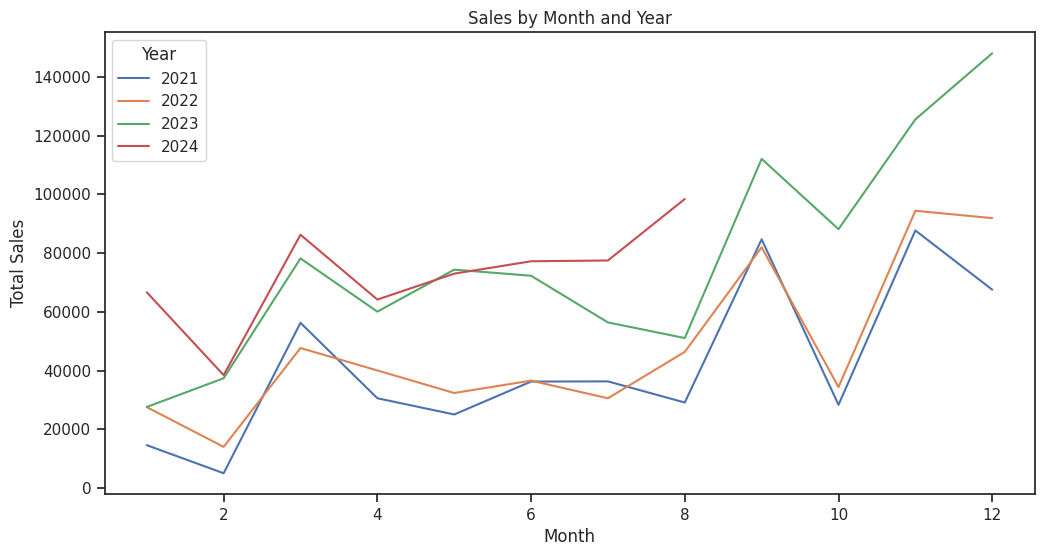

In [ ]:
category_sales = df_total.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=category_sales, palette='deep')
plt.title('Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

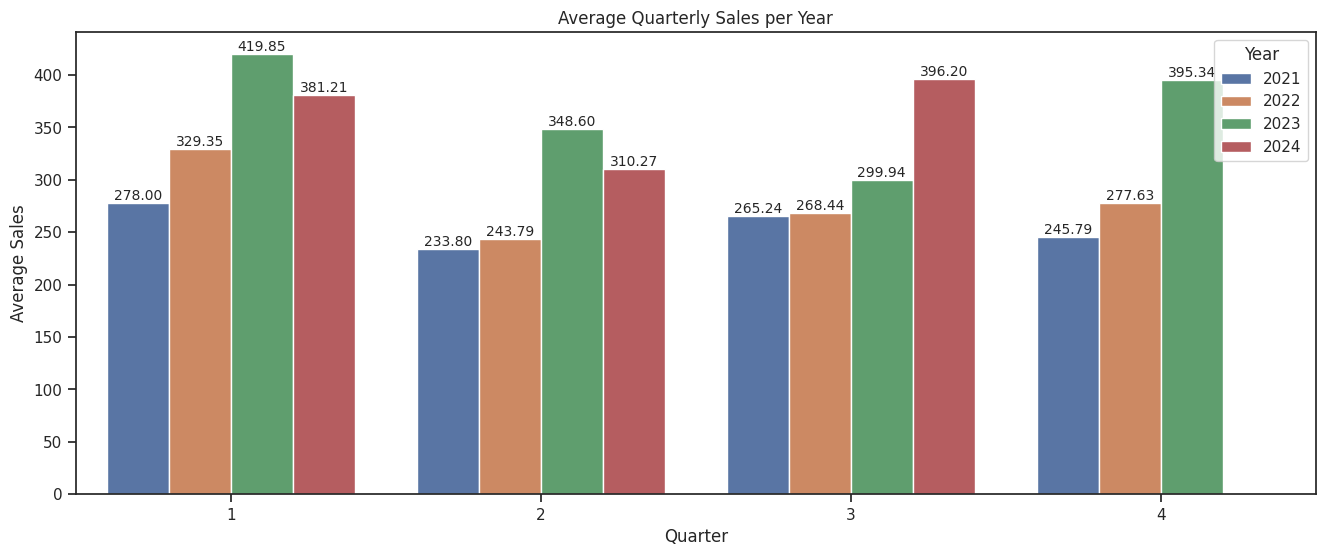

In [ ]:

# Create a bar plot using seaborn.
plt.figure(figsize=(16, 6))
sns.barplot(x='Quarter', y='Sales', hue='Year', data=quarterly_sales, palette='deep')
plt.title('Average Quarterly Sales per Year')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.legend(title='Year', loc='upper right')

# Add mean values on top of the bars
for p in plt.gca().patches:
    if p.get_height() > 0:  # Only add text if the bar's height is greater than 0
        plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(),
                       '{:.2f}'.format(p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.show()
